### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
import warnings
import random 
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as sp

### Reading from csv and converting the object to necessary data type

In [2]:
# df.to_csv('{}.csv'.format(ticker),index=None)
myData = pd.read_csv("Water_Consumption_And_Cost__2013_-_Feb_2022_.csv",index_col=False)
myData['Current Charges']=myData['Current Charges'].str.replace(',', '').astype(float)
myData['Consumption (HCF)']=myData['Consumption (HCF)'].str.replace(',', '').astype(float)
myData["Revenue Month"] = pd.to_datetime(myData["Revenue Month"])
myData["Consumption (H gallons)"] = myData['Consumption (HCF)']*7.4805194805 #converting HCF to H gallons

Note: The intial data set were in the form of object. Because it is hard to deal with the object we first converted those variables to required data types. For example: we converted the Revenue Month column which was intially object to date and time column which will be easier for the analyis in our data. Similarly, we converted Current charges, Consumption(HCF) Column as well to float data type. After that, to be more familier with the data set, we converted Consumption column measurement scale from hundred cubic feet to Hundred gallons. 

**Duplicate data cleaning**

In [3]:
print('Total number of data:', len(myData))
# Remove all duplicate rows 
myData = myData.drop_duplicates(keep=False)
print('Total number of Final data after cleaning:',len(myData))

Total number of data: 46747
Total number of Final data after cleaning: 36397


Note: While dealing with data set, it is possibale that data set can have multiple duplicates rows. So, we need to be careful with those duplicate values which may lead us to false results. Thus, we can remove those duplicates value and kepp the original values only for precise results. In our data set, we have total number of 46,747 number of rows. After cleaning or removing the duplicate row, we will be now working with 36,397 data set for our our further analysis.  

### Seperating the values in terms of borough

In [4]:
manhattan_df= myData.loc[myData['Borough']=='MANHATTAN']
print(len(manhattan_df))
queens_df= myData.loc[myData['Borough']=='QUEENS']
print(len(queens_df))
brooklyn_df= myData.loc[myData['Borough']=='BROOKLYN']
print(len(brooklyn_df))
bronx_df= myData.loc[myData['Borough']=='BRONX']
print(len(bronx_df))
fha_df=myData.loc[myData['Borough']=='FHA']
print(len(fha_df))
staten_island_df= myData.loc[myData['Borough']=='STATEN ISLAND']
print(len(staten_island_df))
non_development_facility_df = myData.loc[myData['Borough']=='NON DEVELOPMENT FACILITY']
print(len(non_development_facility_df))

5962
3054
6598
3586
17083
85
29


Note: Now, we will be seperating the rows in terms of borough of New York City to analyze each data set closly. Also, we will be able to see the patterns of each borough of NYC and we will compare them to find their consumption and charges pattern. Eventhough NYC has five borough, our data set is representing two extra informations as borough. They are FHA and Non-Development Facility with 17083 and 29 rows respectively. We will also analyze them. Similarly, Manhattan, Queens, brooklyn, Bronx and Staten Island have 5962, 3054,6598,3586, and 85 rows respectivly. Now, Lets us view each of the borough individually, 

### 1. Manhattan 

 **a. Calculating Mean and Std**

In [5]:
manhattan_df_imp = manhattan_df[["Revenue Month",'Meter Number','Current Charges','Consumption (H gallons)']]
print(manhattan_df_imp.describe())

manhattan_std_current_charge_df = manhattan_df_imp['Current Charges'].std()
manhattan_std_consumption_df = manhattan_df_imp['Consumption (H gallons)'].std()
manhattan_mean_current_charge_df = manhattan_df_imp['Current Charges'].mean()
manhattan_mean_consumption_df = manhattan_df_imp['Consumption (H gallons)'].mean()

print('Standard deviation of manhattan current charges is:',manhattan_std_current_charge_df)
print('Standard deviation of manhattan consumption (H gallons) is:',manhattan_std_consumption_df)
print('Mean of manhattan current charges is:',manhattan_mean_current_charge_df)
print('Mean of manhattan consumption (H gallons) is:',manhattan_mean_consumption_df)

       Current Charges  Consumption (H gallons)
count      5962.000000             5.962000e+03
mean       4165.275475             3.695288e+03
std        7769.281384             4.234956e+04
min           0.000000             0.000000e+00
25%        1159.030000             8.752208e+02
50%        2319.025000             1.750442e+03
75%        4422.335000             3.403636e+03
max      317444.740000             3.248042e+06
Standard deviation of manhattan current charges is: 7769.281384008849
Standard deviation of manhattan consumption (H gallons) is: 42349.558941954994
Mean of manhattan current charges is: 4165.275474672943
Mean of manhattan consumption (H gallons) is: 3695.287539689868


Note: For the manhattan data set, we first filter the essential column from the original data set. Here we are only accounting Revenue Month, Meter Number, Current Charges, and Consumption (H gallons) for our Manhattan dataset. After that, we first find the standard deviation of Current Charges and Consumption (H gallons) as 7769.281384008849, and 42349.558941954994 respectively. We also find the mean of Current Charges and Consumption (H gallons) as 4165.275474672943 and 3695.287539689868 respectively. 

**b. Finiding the unique Meter numbers in Manhattan**

In [6]:
uniqueMeterNumbers = manhattan_df_imp['Meter Number'].unique()
print('Total number of unique building are:', len(uniqueMeterNumbers))
print('List of unique building is: ',uniqueMeterNumbers)

Total number of unique building are: 130
List of unique building is:  ['V31983271' 'G13036223' 'K10282081' 'K13092222' 'E13325671' 'E13314706'
 'E19263382' 'E19263379' 'E20459024' 'K13203068' 'E20437524' 'V31933788'
 'V84005789' 'V84013722' 'A09000135' 'A10000305' 'A06002042' 'K16795588'
 'I13012733' 'E15958343' 'G13042166' 'E10073926' 'V84008239' 'I11009041'
 'G11019423' 'H00012443' 'G13031843' 'K16839989' 'V84010435' 'UN-METERED'
 'E20437586' 'V31665667' 'V31625177' 'G13036219' 'V31655205' 'V31655226'
 'G13035140' 'N31859627' 'G13039021' 'A08000399' 'A08000848' 'K16137606'
 'E17250201' 'V31625176' 'E98161917' 'V31841824' 'V31625181' 'V31665692'
 'V31625178' 'V31665693' 'G13035785' 'E10052406' 'I13007391' 'K15130328'
 'E17794141' 'V31633777' 'V31665696' 'E17816734' 'O78610228' 'G13035022'
 'I13017366' 'K17794667' 'E17794667' 'E14262266' 'V31625180' 'A08000393'
 'V31665671' 'K17827007' 'O78224451' 'V31665698' 'V31655217' 'G13039199'
 'I13007923' 'V31952918' 'V31665691' 'V31693796' 'G13

In [7]:
len(manhattan_df_imp)

5962

Note: In manhattan, we found out that, there are total number of 130 meter numbers. These are the building, we will be using for analysis. 

In [8]:
manhattan_df_imp = manhattan_df_imp[manhattan_df_imp['Meter Number'] != 'E20437524']
manhattan_df_imp = manhattan_df_imp[manhattan_df_imp['Meter Number'] != 'V31987647']
i = manhattan_df_imp[((manhattan_df_imp['Meter Number'] == 'G13031843') &( manhattan_df_imp['Revenue Month'] == '2019-09-01'))].index
manhattan_df_imp = manhattan_df_imp.drop(i)

**C. Setting outliers and finding Normal Values**

**i. For Consumption**

In [9]:
manhattan_imp_df_ci = pd.DataFrame()
for i in range(len(uniqueMeterNumbers)):
    building_df = manhattan_df_imp.loc[manhattan_df_imp['Meter Number']==uniqueMeterNumbers[i]]
    
   
    building_std_consumption_df = building_df['Consumption (H gallons)'].std()
    building_mean_consumption_df = building_df['Consumption (H gallons)'].mean()
    
    building_df['Normal Consumption'] = ((building_df['Consumption (H gallons)'] - building_mean_consumption_df)/building_std_consumption_df)
    
#     column = building_df['Normal Consumption'] #Finding Normals
#     count1 = column[column < -3].count() #Count the total number of values smaller than -3
#     print(column[column < -3])
#     count2 = column[column > 3].count() #Count the total number of values greater than 3
#     print(column[column > 3])
#     print('Total number of out of range value are: ',count1+count2)

    #Removing normal consumption out of range value
    building_df = building_df[ (building_df['Normal Consumption'] < 10) & (building_df['Normal Consumption'] > -10)]
    
#     column = building_df['Normal Consumption']
#     count1 = column[column < -3].count()
#     # print(column[column < -3])
#     count2 = column[column > 3].count()
#     # print(column[column > 3])
#     print('Total number of out of range value are: ',count1+count2)

      #graphing after removing out of range value

#     # pd.set_option('display.max_rows', manhattan_sort_df.shape[0]+1)
#     plt.rcParams['figure.figsize'] = (20, 10)
#     # plt.rcParams['axes.unicode_minus'] = True
#     building_df.plot(x="Revenue Month", y='Normal Consumption')
#     plt.ylim(-0.15, 1.4)
#     plt.show() 
#     # building_df
    
    manhattan_imp_df_ci = manhattan_imp_df_ci.append(building_df)

    

In [10]:
len(manhattan_imp_df_ci)

5680

In [11]:
print('Total number of left over rows are: ',len(manhattan_df_imp)-len(manhattan_imp_df_ci) )

Total number of left over rows are:  111


**ii. For Current Charges**

In [12]:
manhattan_imp_df_cii = pd.DataFrame()
for i in range(len(uniqueMeterNumbers)):
    building_df = manhattan_imp_df_ci.loc[manhattan_imp_df_ci['Meter Number']==uniqueMeterNumbers[i]]
    
    building_std_current_charge_df = building_df['Current Charges'].std()
    building_mean_current_charge_df = building_df['Current Charges'].mean()
   
    
    building_df['Normal Charges'] = ((building_df['Current Charges'] - building_mean_current_charge_df)/building_std_current_charge_df)
    
#     column = building_df['Normal Consumption'] #Finding Normals
#     count1 = column[column < -3].count() #Count the total number of values smaller than -3
#     print(column[column < -3])
#     count2 = column[column > 3].count() #Count the total number of values greater than 3
#     print(column[column > 3])
#     print('Total number of out of range value are: ',count1+count2)

    #Removing normal consumption out of range value
    building_df = building_df[ (building_df['Normal Charges'] < 10) & (building_df['Normal Charges'] > -10)]
    
#     column = building_df['Normal Consumption']
#     count1 = column[column < -3].count()
#     # print(column[column < -3])
#     count2 = column[column > 3].count()
#     # print(column[column > 3])
#     print('Total number of out of range value are: ',count1+count2)

      #graphing after removing out of range value

#     # pd.set_option('display.max_rows', manhattan_sort_df.shape[0]+1)
#     plt.rcParams['figure.figsize'] = (20, 10)
#     # plt.rcParams['axes.unicode_minus'] = True
#     building_df.plot(x="Revenue Month", y='Normal Consumption')
#     plt.ylim(-0.15, 1.4)
#     plt.show() 
#     # building_df
    
    manhattan_imp_df_cii = manhattan_imp_df_cii.append(building_df)

In [13]:
len(manhattan_imp_df_cii)

5680

In [14]:
print('Total number of left over rows are: ',len(manhattan_df_imp)-len(manhattan_imp_df_cii) )

Total number of left over rows are:  111


In [15]:
uniqueMeterNumbers1 = manhattan_imp_df_cii['Meter Number'].unique()
len(uniqueMeterNumbers1)

122

In [16]:
set(uniqueMeterNumbers).difference(uniqueMeterNumbers1)

{'E12102713',
 'E20437524',
 'E20459024',
 'K17794667',
 'SEWER',
 'UN-METERED',
 'V31987647',
 'WATER & SEWER'}

In [17]:
pd.set_option('display.max_rows', manhattan_df.shape[0]+1)
pd.set_option('display.max_colum', manhattan_df.shape[0]+1)

**Note:** In our Data set, each building might have high variation in their values, which will results us to faulty conclusion in our analysis. To prevent from faulty analysis we set outliers as 10 standard deviation and get the normal value from each of the building in the data set. On doing this, we will have precise result in our analysis.  For further analysis, we work from normal values. 
<br>
 

**D. For each building: if they have same date entry: Take a average of two rows**

In [18]:
manhattan_imp_df_d = pd.DataFrame()
for i in range(len(uniqueMeterNumbers1)):
    building_df = manhattan_imp_df_cii.loc[manhattan_imp_df_cii['Meter Number']==uniqueMeterNumbers1[i]]
    #Taking the average of two rows if they have same date entery values in the data set. 
    building_df = building_df.set_index('Revenue Month').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
    #Saving index as column
    building_df.reset_index(inplace=True)
    #Add back our Meter Number column
    building_df['Meter Number']=uniqueMeterNumbers1[i]
    #Getting the new values from each building and storing them seperatly
    manhattan_imp_df_d = manhattan_imp_df_d.append(building_df) 

In [19]:
len(manhattan_imp_df_d)

5605

**Note** In each building, some of the data set are entered in same day, which might create problem while analyzing the graphs. So, to prevent from error and have clear analysis, we take the avaerage of two rows and save the values for that date. 

**E. Selecting the data between two dates**

In [20]:
start_date = '2013-01-01'
end_date = '2021-12-31'
# Select DataFrame rows between two dates
mask = (manhattan_imp_df_d['Revenue Month'] >= start_date) & (manhattan_imp_df_d['Revenue Month'] <= end_date)
manhattan_imp_df_e = manhattan_imp_df_d.loc[mask]

In [21]:
len(manhattan_imp_df_e)

5540

Check How many meter numbers we have now: 

In [22]:
uniqueMeterNumbers_e = manhattan_imp_df_e['Meter Number'].unique()
print('Total number of unique building are:', len(uniqueMeterNumbers_e))

Total number of unique building are: 121


In [23]:
result = [i for i in uniqueMeterNumbers1 if i not in uniqueMeterNumbers_e]
print(result)

['13054018']


**Note:** Initial availabe data for analysis is from Jan 2013 to Jun 2020, but we don't have full data available for 2020. Thus, we only take our range as nine years starting from 2013 to 2021. It will be the range for our analysis. 

**F. For each building: Remove all the building if they don't have sufficient amount of data for analysis**

In [24]:
manhattan_imp_df_f = pd.DataFrame()
for i in range(len(uniqueMeterNumbers_e)):
    building_df = manhattan_imp_df_e.loc[manhattan_imp_df_e['Meter Number']==uniqueMeterNumbers_e[i]]
    building_df['month1'] = pd.DatetimeIndex(building_df['Revenue Month']).month
    building_df['year1'] = pd.DatetimeIndex(building_df['Revenue Month']).year
    if(len(building_df)>40):
        #Getting the new values from each building and storing them seperatly
        manhattan_imp_df_f = manhattan_imp_df_f.append(building_df)

In [25]:
uniqueMeterNumbers_f = manhattan_imp_df_f['Meter Number'].unique()
print(len(uniqueMeterNumbers_f))
print(len(manhattan_imp_df_f))

59
4337


**Lets find the missing meter numbers**

In [26]:
result = set(uniqueMeterNumbers_e).difference(uniqueMeterNumbers_f)
print('Total number of missing Meter number from last dataset is:', len(result))
print(result)

Total number of missing Meter number from last dataset is: 62
{'K15070568', 'V84014996', 'V31625177', 'I13011099', 'N31987647', 'G11019423', 'K17808277', 'E20437586', 'O78778208', 'V31693796', 'G13036223', 'V84013722', 'N31859627', 'A09000135', 'K17845249', 'G13042166', 'I13017366', 'E13325577', 'K17047313', 'E17816734', 'K15070570', 'E10073926', 'V84008239', 'E19263379', 'H00012443', 'K13092222', 'V31655217', 'K12447340', 'E17794667', 'E17250201', 'E11337376', 'G17004062', 'A10000305', 'E19822076', 'K10282081', 'V84005789', 'E14122365', 'V84005879', 'K17794666', 'G13035785', '13053913', 'E13325507', 'V31933788', 'G13039199', 'E12261745', 'G15004279', 'G13023696', 'V31665693', 'N84014753', 'V31665607', 'E14081316', 'G13035140', 'K17827007', 'G13035022', 'K17790565', 'E19263382', 'N31698079', 'I13009691', 'V31655226', 'E14262266', 'O78224451', 'G13039021'}


In [27]:
uniqueMeterNumbers_f

array(['V31983271', 'E13325671', 'E13314706', 'K13203068', 'A06002042',
       'K16795588', 'I13012733', 'E15958343', 'I11009041', 'G13031843',
       'K16839989', 'V84010435', 'V31665667', 'G13036219', 'V31655205',
       'A08000399', 'A08000848', 'K16137606', 'V31625176', 'E98161917',
       'V31841824', 'V31625181', 'V31665692', 'V31625178', 'E10052406',
       'I13007391', 'K15130328', 'E17794141', 'V31633777', 'V31665696',
       'O78610228', 'V31625180', 'A08000393', 'V31665671', 'V31665698',
       'I13007923', 'V31952918', 'V31665691', 'G13023666', 'V31847574',
       'V31946013', 'V31625179', 'G13029990', 'B35397973', 'O78224452',
       'E12324074', 'O76882750', 'O76882752', 'V83028987', 'E10127758',
       'V31976211', 'E09010097', 'E09010099', 'E94618885', 'I13005250',
       'K16838962', 'I13005313', 'K14834217', 'I13011093'], dtype=object)

In [28]:
len(uniqueMeterNumbers_f)

59

**Note:** After looking at each data set, we found out that, not all of the data set have full data which means all the data from 2013 to 2021 is not provided. Some of them are starting from 2019/2020/2021 or their data span is not long as expected. Hence, it will be hard to analyze those sorts of data. Also they may lead us to false result. So, we discard those types of data whose span is not that long. We try our data be atlest five years of span so, that we have enough resolution to compute statistics. After removing these data set we now only have ...

**G. Adding the missing months from 2013 to 2021 in our sata set**

In [29]:
manhattan_imp_df_g = pd.DataFrame()
for i in range(len(uniqueMeterNumbers_f)):
    building_df = manhattan_imp_df_f.loc[manhattan_imp_df_f['Meter Number']==uniqueMeterNumbers_f[i]]  
    #date insertion for missing dates
    f = lambda x: x.reindex(pd.date_range('2013-01-01','2021-12-31', freq='MS', name='Revenue Month'))
    building_df = building_df.set_index('Revenue Month').groupby('Meter Number').apply(f).drop('Meter Number', axis=1)
    building_df = building_df.reset_index()
    #Getting the new values from each building and storing them seperatly
    #Add back our Meter Number column
    building_df['Meter Number']=uniqueMeterNumbers_f[i]
    manhattan_imp_df_g = manhattan_imp_df_g.append(building_df) 
    #Adding the Month Column to identify the month of each row. 
    manhattan_imp_df_g['month'] = pd.DatetimeIndex(manhattan_imp_df_g['Revenue Month']).month
    manhattan_imp_df_g['year'] = pd.DatetimeIndex(manhattan_imp_df_g['Revenue Month']).year

**Note:** We have many missing month in our dataset even we get rid of less number of rows from our data. So, to have clear vitualization, we will initially add all the missing months for each buildings with NaN values. 

In [30]:
pd.set_option('display.max_rows', manhattan_imp_df_g.shape[0]+1)
pd.set_option('display.max_colum', manhattan_imp_df_g.shape[0]+1)
# manhattan_imp_df_g


**H. Adding the value for missing months in our data Set**

In [98]:
manhattan_imp_df_h = pd.DataFrame()
for k in range(len(uniqueMeterNumbers_f)):
    aa = uniqueMeterNumbers_f[k]
    building_df = manhattan_imp_df_g.loc[manhattan_imp_df_g['Meter Number']== aa]
    building_df1 = manhattan_imp_df_f.loc[manhattan_imp_df_f['Meter Number']== aa]
    for i in range(12):
        if(i==0):
            building_month = building_df.loc[building_df['month']== 1]
            building_month1 = building_df1.loc[building_df1['month1']== 1]
            building_month2 = building_df1.loc[building_df1['month1']== 12]
            building_month3 = building_df1.loc[building_df1['month1']== 2]

            building_three_months_df = pd.DataFrame()

            building_three_months_df = building_three_months_df.append(building_month1)
            building_three_months_df = building_three_months_df.append(building_month2)
            building_three_months_df = building_three_months_df.append(building_month3)


            for j in range(9):
                building_year = building_month.loc[building_month['year']== 2013+j]

                bulding_random = building_three_months_df.sample()


                consumption_val = bulding_random['Consumption (H gallons)'].iat[0]
                charges_val = bulding_random['Current Charges'].iat[0]
                Normal_consumption_val = bulding_random['Normal Consumption'].iat[0]
                Normal_charges_val = bulding_random['Normal Charges'].iat[0]

                building_year['Consumption (H gallons)']=building_year['Consumption (H gallons)'].fillna(consumption_val)
                building_year['Current Charges']= building_year['Current Charges'].fillna(charges_val)
                building_year['Normal Consumption']=building_year['Normal Consumption'].fillna(Normal_consumption_val)
                building_year['Normal Charges']= building_year['Normal Charges'].fillna(Normal_charges_val)
                manhattan_imp_df_h = manhattan_imp_df_h.append(building_year)



        elif(i==11): 
            building_month = building_df.loc[building_df['month']== 12]
            building_month1 = building_df1.loc[building_df1['month1']== 12]
            building_month2 = building_df1.loc[building_df1['month1']== 11]
            building_month3 = building_df1.loc[building_df1['month1']== 1]

            building_three_months_df = pd.DataFrame()

            building_three_months_df = building_three_months_df.append(building_month1)
            building_three_months_df = building_three_months_df.append(building_month2)
            building_three_months_df = building_three_months_df.append(building_month3)

            for j in range(9):
                building_year = building_month.loc[building_month['year']== 2013+j]

                bulding_random = building_three_months_df.sample()

                consumption_val = bulding_random['Consumption (H gallons)'].iat[0]
                charges_val = bulding_random['Current Charges'].iat[0]
                Normal_consumption_val = bulding_random['Normal Consumption'].iat[0]
                Normal_charges_val = bulding_random['Normal Charges'].iat[0]

                building_year['Consumption (H gallons)']=building_year['Consumption (H gallons)'].fillna(consumption_val)
                building_year['Current Charges']= building_year['Current Charges'].fillna(charges_val)
                building_year['Normal Consumption']=building_year['Normal Consumption'].fillna(Normal_consumption_val)
                building_year['Normal Charges']= building_year['Normal Charges'].fillna(Normal_charges_val)
                manhattan_imp_df_h = manhattan_imp_df_h.append(building_year)




        else:
            building_month = building_df.loc[building_df['month']== i+1]
            building_month1 = building_df1.loc[building_df1['month1']== i+1]
            building_month2 = building_df1.loc[building_df1['month1']== i]
            building_month3 = building_df1.loc[building_df1['month1']== i+2]

            building_three_months_df = pd.DataFrame()

            building_three_months_df = building_three_months_df.append(building_month1)
            building_three_months_df = building_three_months_df.append(building_month2)
            building_three_months_df = building_three_months_df.append(building_month3)

            for j in range(9):
                building_year = building_month.loc[building_month['year']== 2013+j]

                bulding_random = building_three_months_df.sample()

                consumption_val = bulding_random['Consumption (H gallons)'].iat[0]
                charges_val = bulding_random['Current Charges'].iat[0]
                Normal_consumption_val = bulding_random['Normal Consumption'].iat[0]
                Normal_charges_val = bulding_random['Normal Charges'].iat[0]


                building_year['Consumption (H gallons)']=building_year['Consumption (H gallons)'].fillna(consumption_val)
                building_year['Current Charges']= building_year['Current Charges'].fillna(charges_val)
                building_year['Normal Consumption']=building_year['Normal Consumption'].fillna(Normal_consumption_val)
                building_year['Normal Charges']= building_year['Normal Charges'].fillna(Normal_charges_val)
                manhattan_imp_df_h = manhattan_imp_df_h.append(building_year)

In [99]:
manhattan_imp_df_h=manhattan_imp_df_h.sort_values(by='Revenue Month')
manhattan_imp_df_h

Meter Number Revenue Month  Current Charges  Consumption (H gallons)  \
0      V31983271    2013-01-01     11130.990000              8438.025974   
0      E09010099    2013-01-01      5999.680000              4548.155844   
0      G13031843    2013-01-01     30807.580000             23354.181818   
0      V31952918    2013-01-01      1245.790000               972.467532   
0      V31665691    2013-01-01      9438.610000              8041.558442   
0      E10052406    2013-01-01      6260.210000              5333.610390   
0      I11009041    2013-01-01      3207.070000              2431.168831   
0      G13023666    2013-01-01       680.890000               516.155844   
0      V31847574    2013-01-01      2871.560000              2176.831169   
0      I13011093    2013-01-01      5417.320000              4615.480519   
0      V31665667    2013-01-01      4135.430000              3523.324675   
0      A08000399    2013-01-01      2772.880000              2102.025974   
0      E15958343    2013-01-01     20729.820000             17661.506493   
0      V31946013    2013-01-01      5644.390000              4406.025974   
0      V31625179    2013-01-01      1025.380000               800.415584   
0      E09010097    2013-01-01      3384.350000              2730.389610   
0      I13007923    2013-01-01      7937.210000              6762.389610   
0      V31665692    2013-01-01      2131.470000              1615.792208   
0      I13005250    2013-01-01      8815.220000              7510.441558   
0      I13007391    2013-01-01      5250.500000              4473.350649   
0      K14834217    2013-01-01       182.080000               142.129870   
0      V31633777    2013-01-01        40.610000                 7.480519   
0      V31665696    2013-01-01      1581.200000              1234.285714   
0      E13325671    2013-01-01        34.270000                 0.000000   
0      E94618885    2013-01-01      4363.710000              3717.818182   
0      E17794141    2013-01-01      5399.760000              4600.519481   
0      O78610228    2013-01-01       226.960000               172.051948   
0      G13036219    2013-01-01      2486.710000              1885.090909   
0      V31625180    2013-01-01      6804.580000              5797.402597   
0      V84010435    2013-01-01       421.650000               329.142857   
0      A08000393    2013-01-01       964.310000               777.974026   
0      K15130328    2013-01-01      4047.630000              3448.519481   
0      V31665671    2013-01-01     11019.030000              9388.051948   
0      K16839989    2013-01-01      1102.050000               860.259740   
0      V31665698    2013-01-01      3363.630000              2625.662338   
0      V31655205    2013-01-01      6945.060000              5917.090909   
0      E13314706    2013-01-01     31764.770000             24079.792208   
0      V31625178    2013-01-01      4003.730000              3411.116883   
0      O76882750    2013-01-01       453.920000               344.103896   
0      E98161917    2013-01-01      3582.280000              3052.051948   
0      A06002042    2013-01-01     17972.860000             15312.623377   
0      O76882752    2013-01-01       296.040000               224.415584   
0      E12324074    2013-01-01        59.210000                44.883117   
0      K16795588    2013-01-01      9807.370000              8355.740260   
0      V31841824    2013-01-01      2881.430000              2184.311688   
0      V83028987    2013-01-01      3292.820000                 0.000000   
0      K16838962    2013-01-01      2763.010000              2094.545455   
0      I13005313    2013-01-01     10580.020000              9014.025974   
0      V31625176    2013-01-01     13407.210000             11422.753247   
0      O78224452    2013-01-01       414.450000               314.181818   
0      V31976211    2013-01-01      7943.660000              6021.818182   
0      K16137606    2013-01-01     12257.020000     

In [33]:
# manhattan_imp_df_h = manhattan_imp_df_h.drop(columns=['month1', 'year1'])

**Note:** Snice, all the dataset is not available to compute our analysis. we need to insert the value to make analysis with less error. Here we insert the value in each buildings in such way that missing value for each month will get the random value from previous, present and next month values from own building dataset. On doing this, they will not have high variation in data and we will have less error in our value assumption. 

**I. Taking the average of each month in the data set**

For Consumption: 


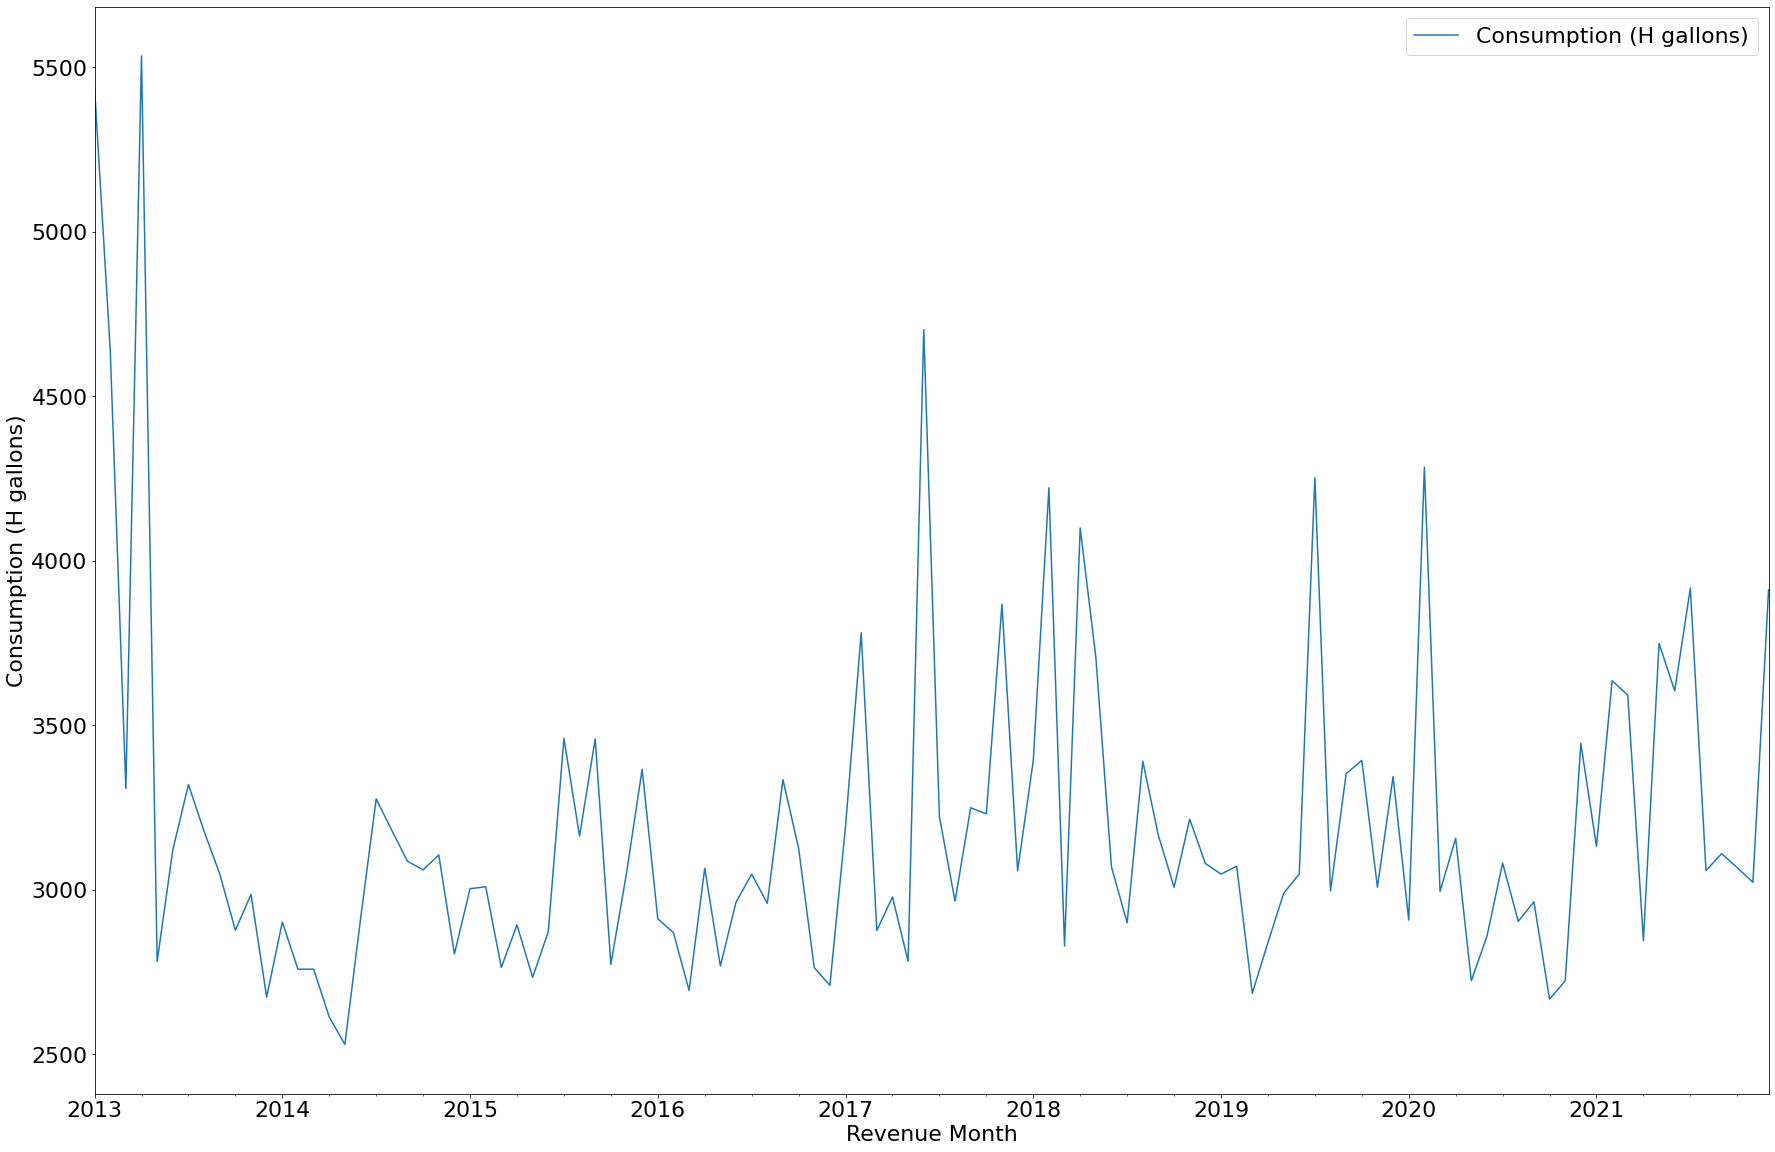

For Current Charges: 


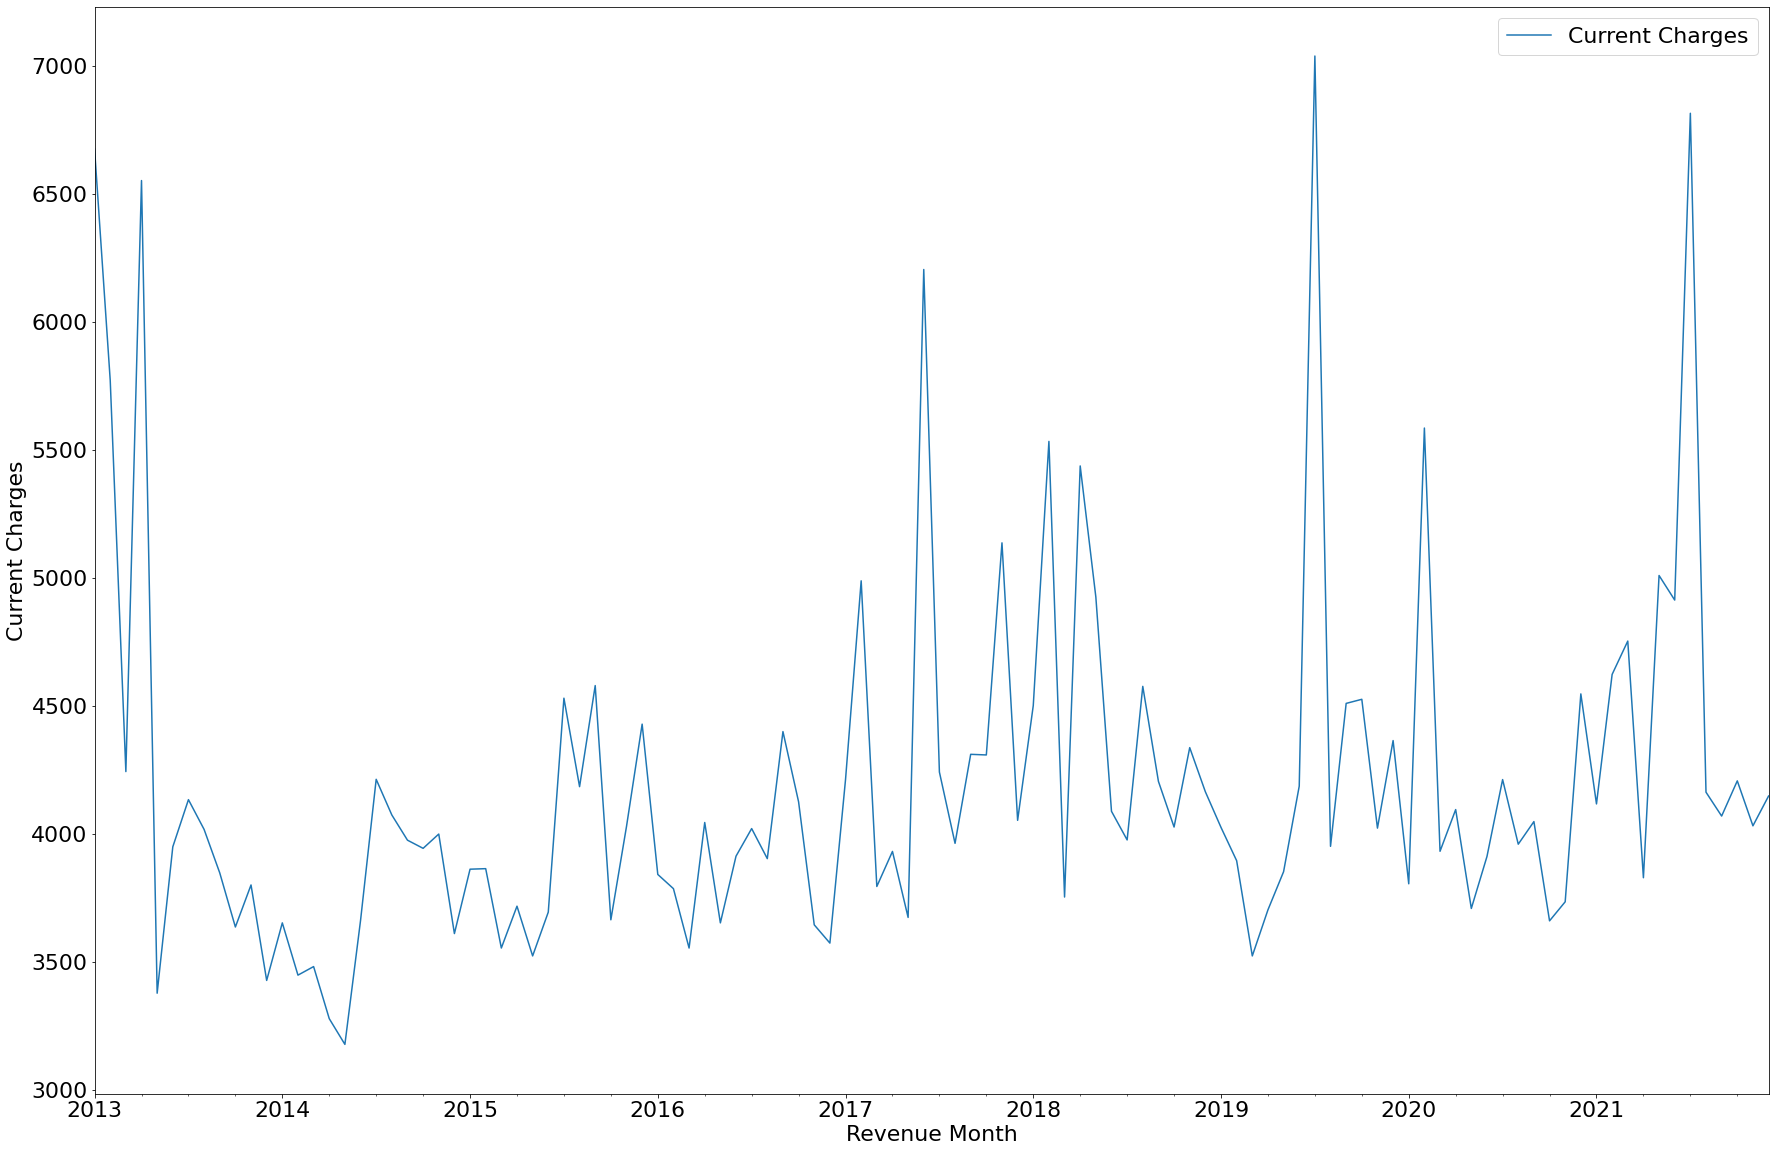

In [291]:
#Taking the average of two rows if they have same date entery values in the data set. 
# manhattan_average_df_I = manhattan_imp_df_h.set_index('Revenue Month').groupby(pd.Grouper(freq='M')).mean().dropna(how='all')
manhattan_average_df_I = manhattan_imp_df_h.groupby('Revenue Month').mean()

manhattan_average_df_I['Revenue Month'] = manhattan_average_df_I.index

#Saving index as column
# building_df.reset_index(inplace=True)

plt.rcParams['figure.figsize'] = (30, 20)
print('For Consumption: ')
manhattan_average_df_I.plot(x="Revenue Month", y="Consumption (H gallons)")
plt.ylabel("Consumption (H gallons)")
plt.show() # Graphing show of Current Charges
print('For Current Charges: ')
manhattan_average_df_I.plot(x="Revenue Month", y="Current Charges")
plt.ylabel("Current Charges")
plt.show() # Graphing show of Current Charges

In [108]:
manhattan_average_df_I

Current Charges  Consumption (H gallons)  Normal Consumption  \
Revenue Month                                                                 
2013-01-01         6673.501017              5436.435835            1.573890   
2013-02-01         5770.571356              4640.838213            0.896699   
2013-03-01         4242.199831              3307.277130            0.283791   
2013-04-01         6550.743051              5534.316531            1.722772   
2013-05-01         3376.546525              2781.168391           -0.216094   
2013-06-01         3948.320678              3120.517720            0.060598   
2013-07-01         4132.569746              3319.322034           -0.056418   
2013-08-01         4016.343220              3177.192164           -0.095641   
2013-09-01         3846.665254              3047.994717            0.006884   
2013-10-01         3635.160847              2876.449923           -0.256087   
2013-11-01         3799.355424              2985.488004           -0.138586   
2013-12-01         3426.492034              2673.208012           -0.310730   
2014-01-01         3651.283898              2901.300462           -0.124400   
2014-02-01         3447.135424              2757.902707           -0.152807   
2014-03-01         3480.554237              2758.156284           -0.226515   
2014-04-01         3277.191186              2612.603126           -0.245346   
2014-05-01         3176.666780              2529.429892           -0.133894   
2014-06-01         3660.415932              2910.048866           -0.018854   
2014-07-01         4211.996780              3275.960379            0.068462   
2014-08-01         4072.728305              3180.108298            0.072550   
2014-09-01         3974.287458              3086.158045            0.043215   
2014-10-01         3942.430339              3059.912833           -0.022025   
2014-11-01         3998.237627              3105.303104           -0.050216   
2014-12-01         3609.486102              2804.434074           -0.197304   
2015-01-01         3860.941356              3002.731235            0.014148   
2015-02-01         3863.041186              3008.690293           -0.039681   
2015-03-01         3553.058814              2763.354611           -0.174773   
2015-04-01         3716.429153              2892.678847           -0.075227   
2015-05-01         3522.191525              2733.052168           -0.189029   
2015-06-01         3693.220508              2871.758750           -0.122097   
2015-07-01         4528.898644              3460.057231            0.297469   
2015-08-01         4183.310339              3162.991856            0.018197   
2015-09-01         4578.123898              3458.282192            0.205712   
2015-10-01         3663.294746              2772.863746           -0.100922   
2015-11-01         4027.802712              3049.896544            0.160481   
2015-12-01         4427.524576              3365.980189           -0.049024   
2016-01-01         3840.452881              2911.316751           -0.027731   
2016-02-01         3784.924915              2869.222980           -0.220050   
2016-03-01         3552.946102              2693.367378           -0.301775   
2016-04-01         4043.330678              3065.111160           -0.002187   
2016-05-01         3651.266610              2767.792208           -0.197939   
2016-06-01         3911.801864              2961.524983           -0.141684   
2016-07-01         4019.627797              3047.107198           -0.083330   
2016-08-01         3902.168475              2958.101695           -0.200149   
2016-09-01         4398.407797              3334.283073            0.036914   
2016-10-01         4123.946102              3126.223201           -0.109759   
2016-11-01         3643.638475              2762.974246           -0.280890   
2016-12-01         3572.338644              2708.835571           -0.285610   
2017-01-01         4211.085085              3192.279991          

**Note** We are taking mean of each month from 2013 to 2021 which will help us see which month had highest number of consumption or how each month are acting on average from 2013 to 2021. 

**J. Monthly average of Manhattan dataset**

For Consumption: 


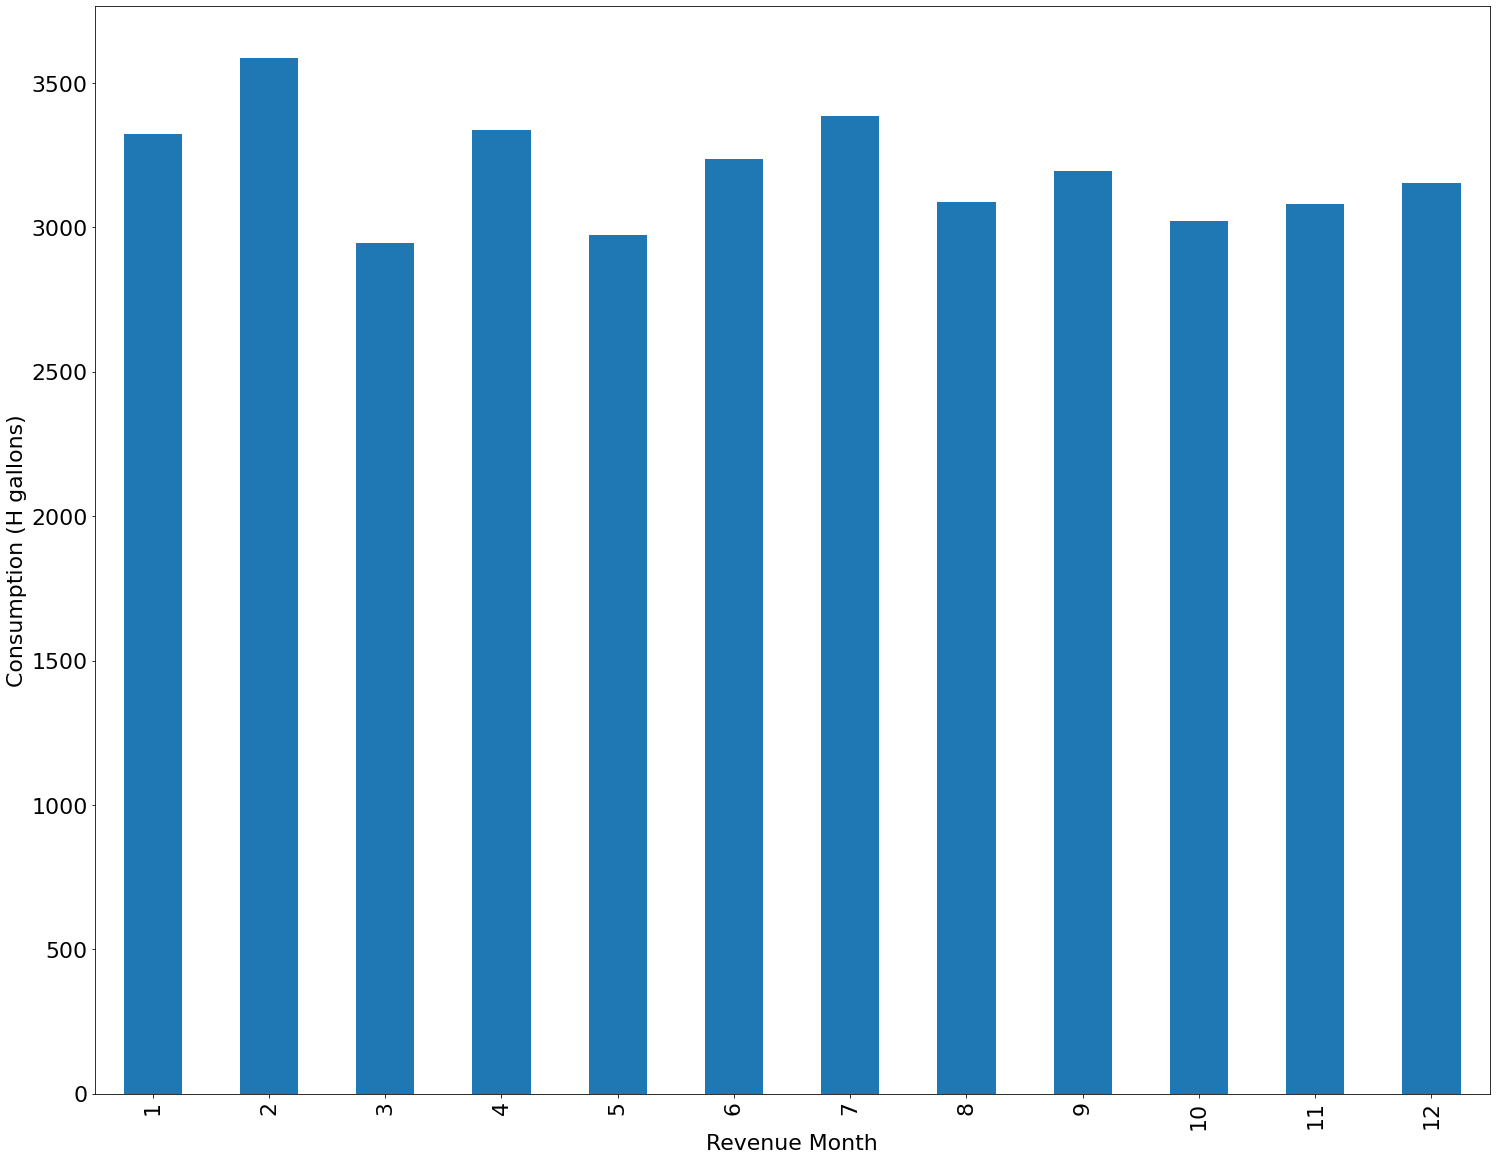

For Current Charges: 


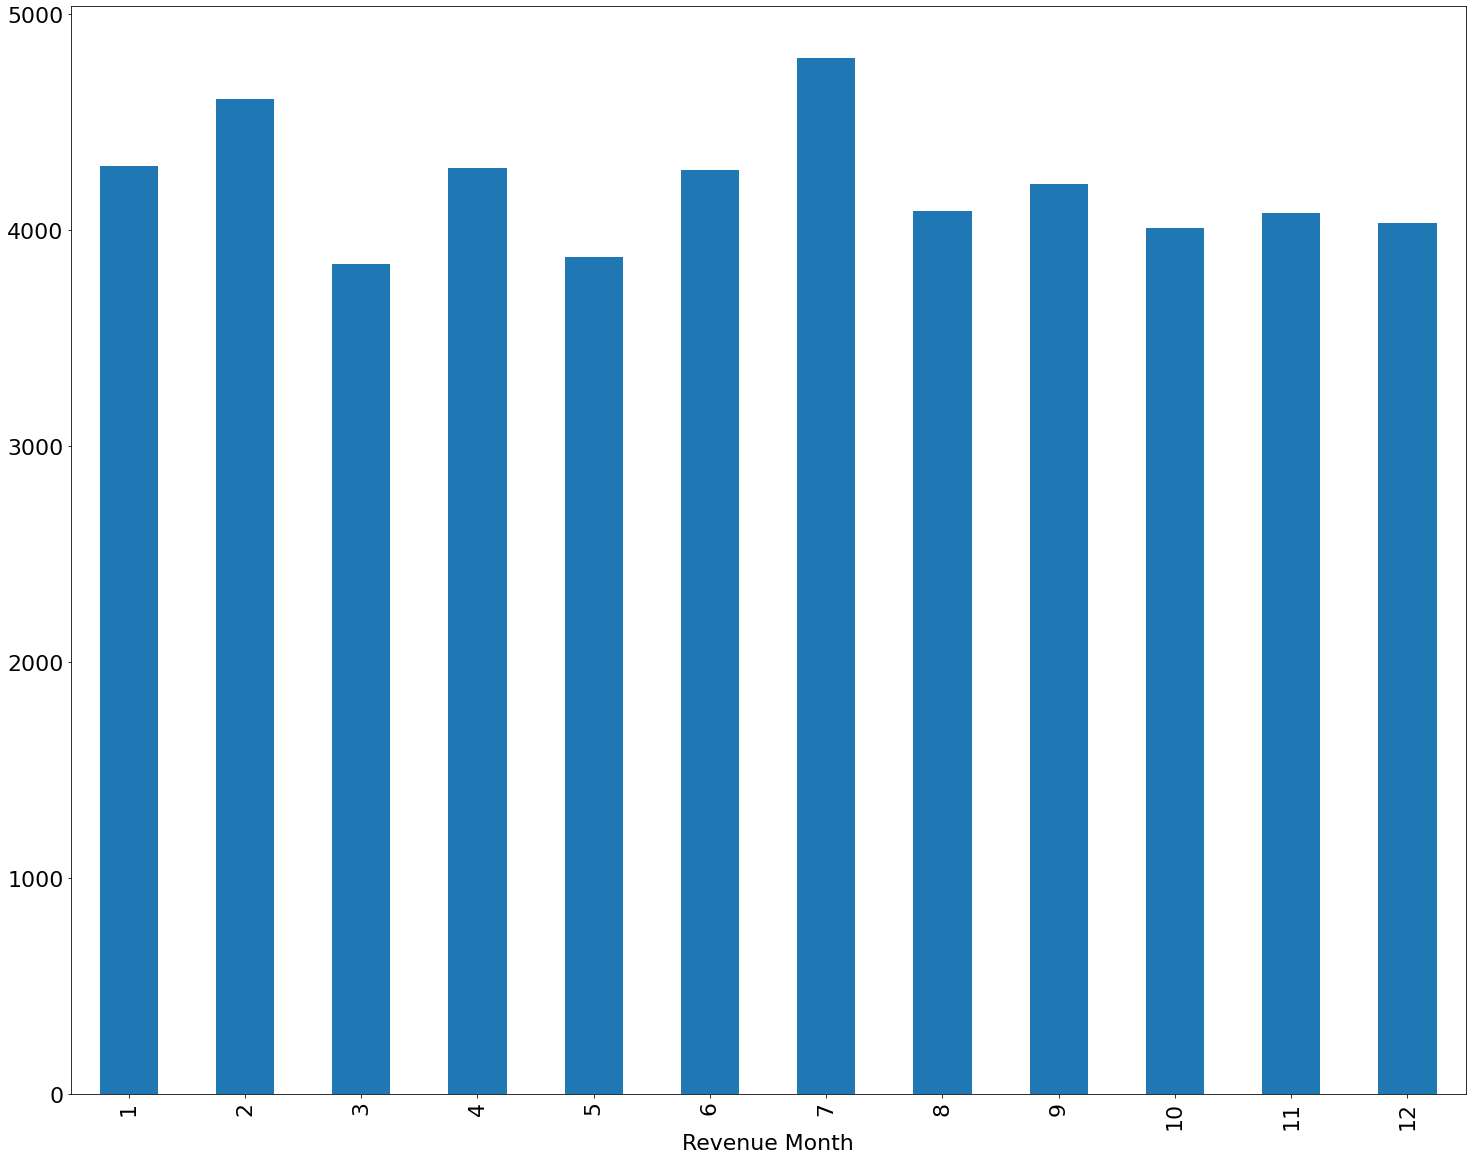

In [297]:
print('For Consumption: ')
plt.rcParams['figure.figsize'] = (25, 20)
manhattan_average_df_J = manhattan_average_df_I.groupby(manhattan_average_df_I['Revenue Month'].dt.month)['Consumption (H gallons)'].mean()
manhattan_average_df_J.plot.bar(x="Revenue Month", y="Consumption (H gallons)")
plt.ylabel("Consumption (H gallons)")
plt.show()


print('For Current Charges: ')
manhattan_average_df_J = manhattan_average_df_I.groupby(manhattan_average_df_I['Revenue Month'].dt.month)['Current Charges'].mean()
manhattan_average_df_J.plot.bar(x="Revenue Month", y="Current Charges")
plt.show()

**Note** Here we are analysisng the avaerage monthly behaviour of the manhattan data base. It will lead us to see how each boroughs are behaving in each sesons. Their nature migh differ in Fall, Spring, summer, and Winter. Hence, seasonality analsysis will give us analysis of consumption of water interms of season. 

**k. Manhattan Dataset: Normal Value view of consumption and current charges**

For Consumption: 


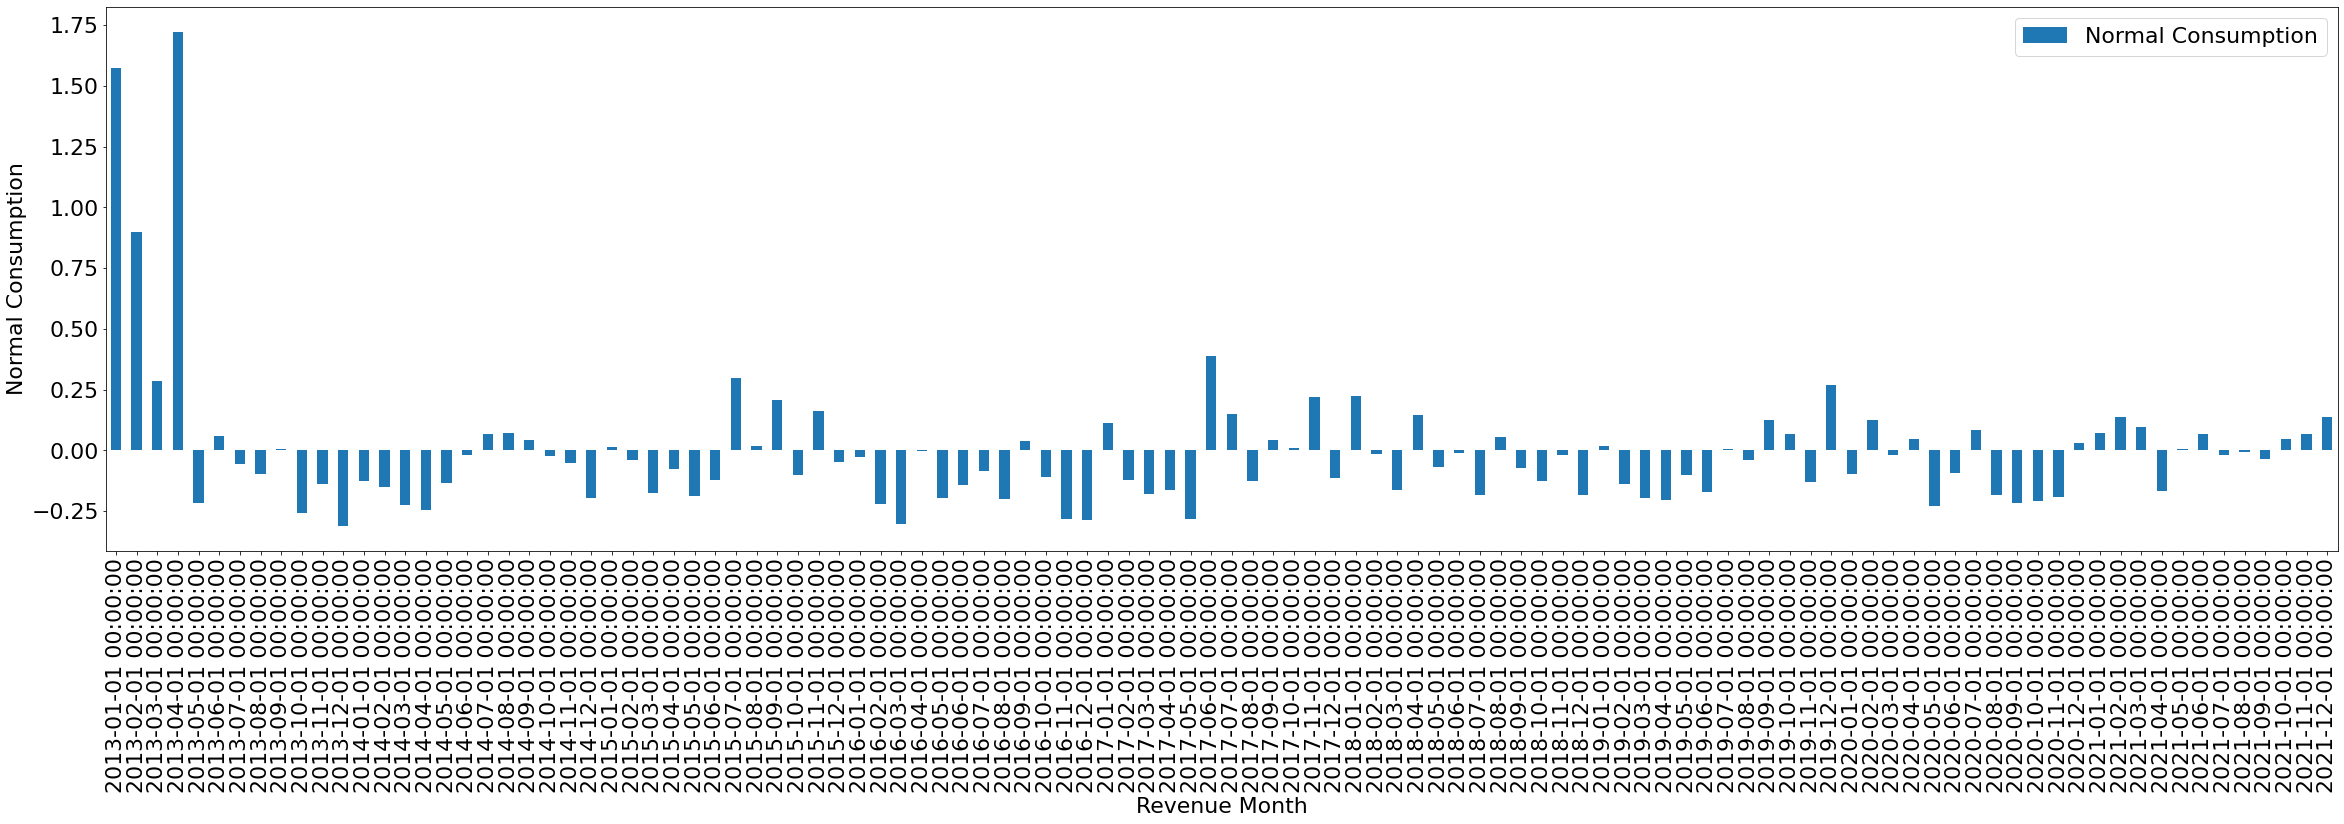

For Current Charges: 


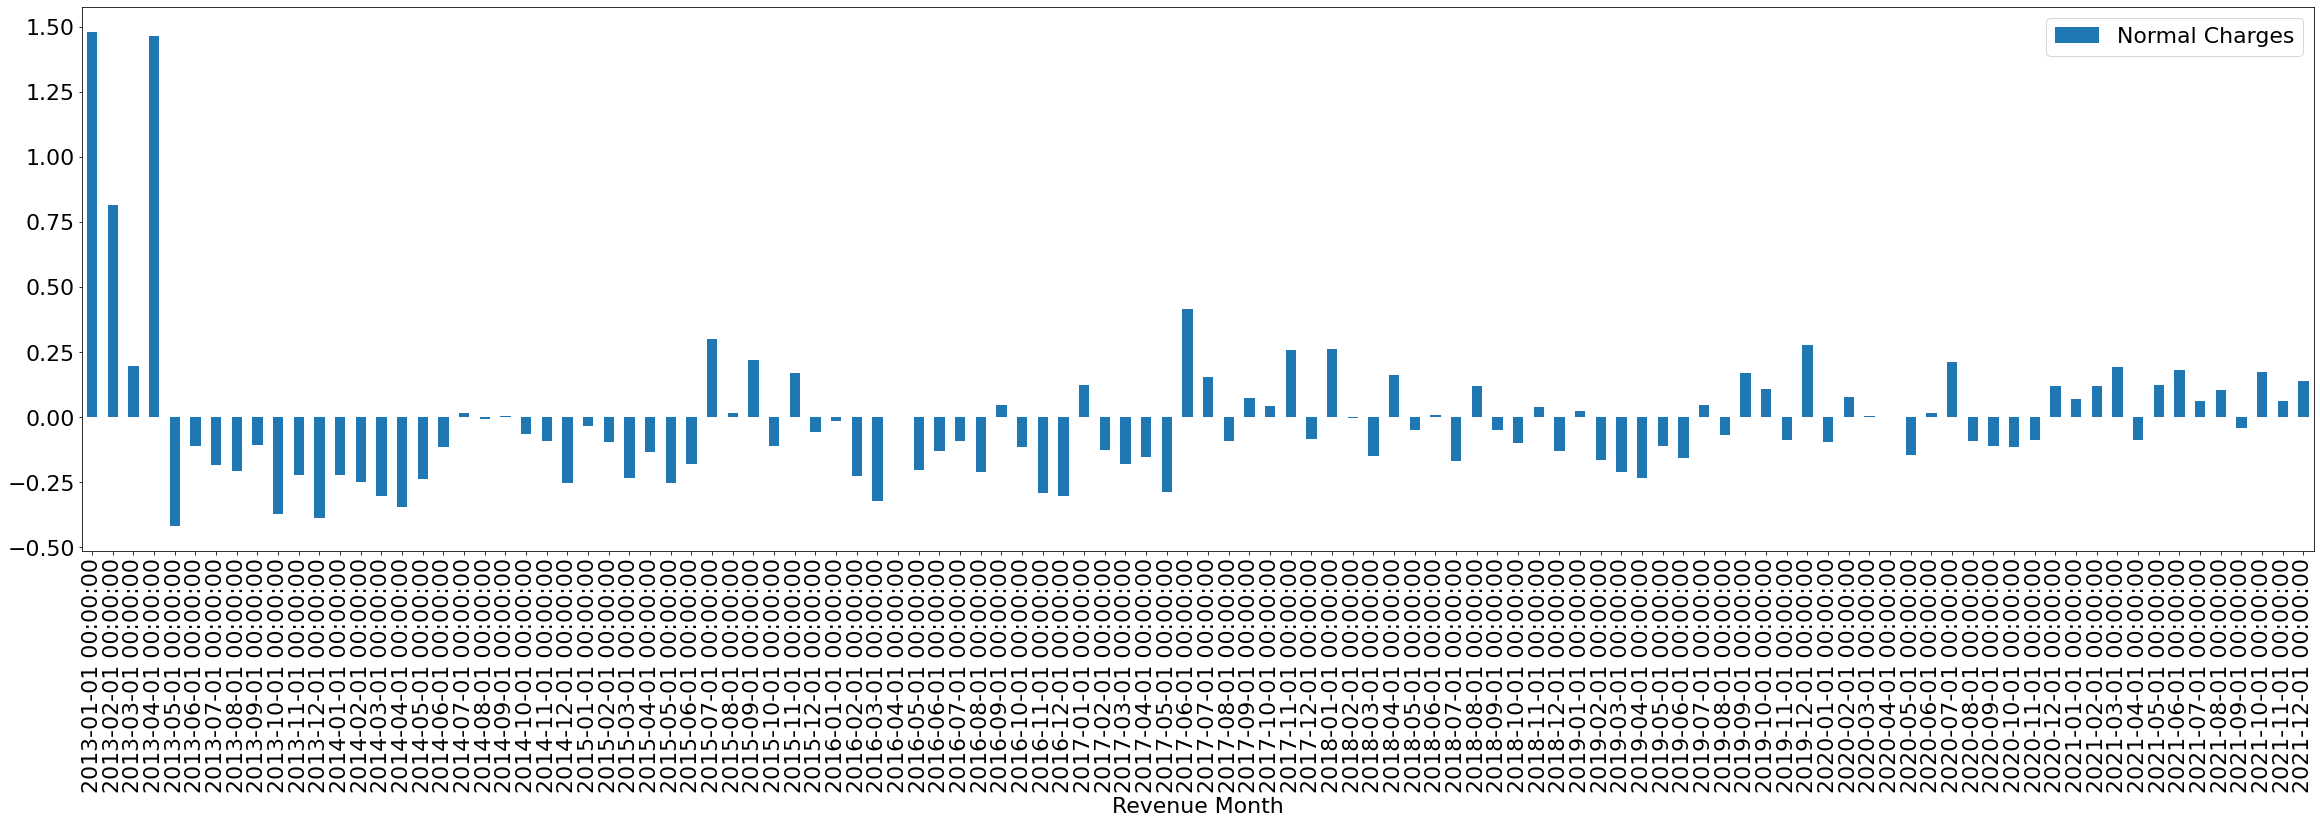

In [300]:
plt.rcParams['figure.figsize'] = (40, 10)
print('For Consumption: ')
manhattan_average_df_I.plot.bar(x="Revenue Month", y="Normal Consumption")
plt.ylabel("Normal Consumption")
plt.show() # Graphing show of Current Charges
print('For Current Charges: ')
manhattan_average_df_I.plot.bar(x="Revenue Month", y="Normal Charges")
plt.show() # Graphing show of Current Charges

**L.  monthly mean analysis for Normal values.**

For Consumption: 


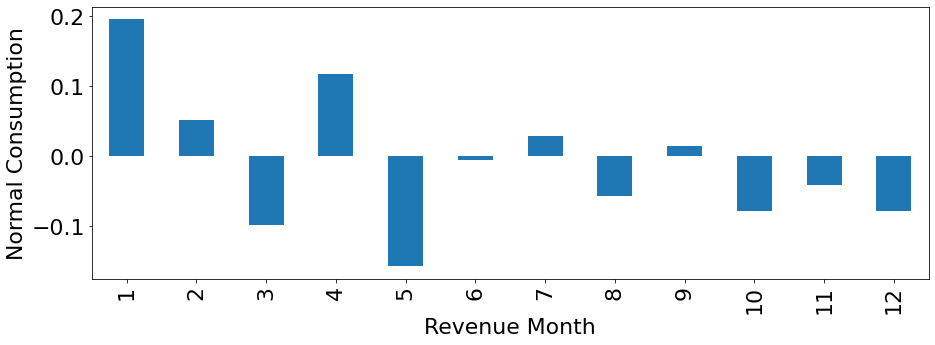

For Current Charges: 


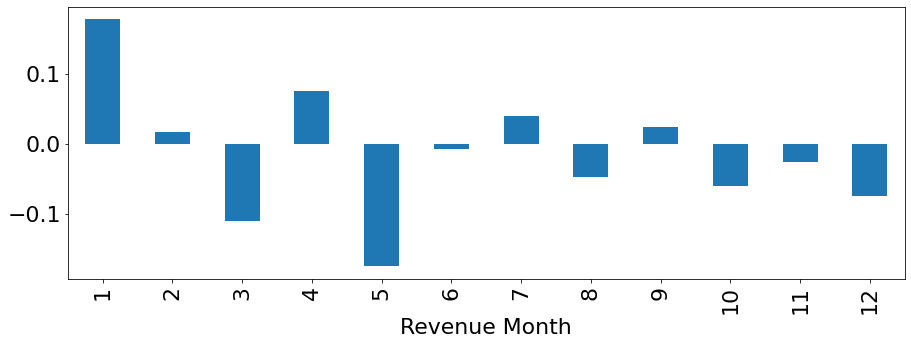

In [307]:
print('For Consumption: ')
plt.rcParams['figure.figsize'] = (15, 5)
manhattan_average_df_L = manhattan_average_df_I.groupby(manhattan_average_df_I['Revenue Month'].dt.month)['Normal Consumption'].mean()
manhattan_average_df_L.plot.bar(x="Revenue Month", y="Normal Consumption")
plt.ylabel("Normal Consumption")
plt.show()


print('For Current Charges: ')
manhattan_average_df_L = manhattan_average_df_I.groupby(manhattan_average_df_I['Revenue Month'].dt.month)['Normal Charges'].mean()
manhattan_average_df_L.plot.bar(x="Revenue Month", y="Normal Charges")
plt.show()

**M. Lets see nature of each Building**

In [112]:
# for i in range(len(uniqueMeterNumbers_f)):
#     building_df = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']==uniqueMeterNumbers_f[i]]
#     print('For Meter Number: ',uniqueMeterNumbers_f[i])
#     print('For Consumption: ')
#     building_df_consumption_mean = building_df.groupby(building_df['Revenue Month'].dt.month)['Consumption (H gallons)'].mean()
#     building_df.plot.bar(x="Revenue Month", y="Consumption (H gallons)")
#     plt.show()
#     building_df_consumption_mean.plot.bar(x="Revenue Month", y="Consumption (H gallons)")
#     plt.show()
#     print('For Current Charges: ')
#     building_df_current_Charges_mean = building_df.groupby(building_df['Revenue Month'].dt.month)['Current Charges'].mean()
#     building_df.plot.bar(x="Revenue Month", y="Current Charges")
#     plt.show()
#     building_df_current_Charges_mean.plot.bar(x="Revenue Month", y="Current Charges")
#     plt.show()
#     print('-'*150)

In [113]:
# building_df = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']== 'V31987647']
# building_df

**N. Corelation**

In [114]:
# count1 =0
# count2=0
# for i in range(len(uniqueMeterNumbers_f)):
#     if(i==len(uniqueMeterNumbers_f)-1):
#         break;
#     plt.rcParams['figure.figsize'] = (10, 10)
#     print('For Meter Number: ',uniqueMeterNumbers_f[i], 'and ', uniqueMeterNumbers_f[i+1])
#     a1 = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']==uniqueMeterNumbers_f[i]]
#     a2 = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']==uniqueMeterNumbers_f[i+1]]
    
#     #For Current Charge
#     X = a1.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
#     Y = a2.iloc[:, 2].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
#     #For Consumption 
#     M = a1.iloc[:, 3].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
#     N = a2.iloc[:, 3].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
    
#     linear_regressor = LinearRegression()
    
#     linear_regressor.fit(X, Y)
#     linear_regressor.fit(M, N)
    
#     Y_pred = linear_regressor.predict(X)
#     N_pred = linear_regressor.predict(M)
    
#     print('Consumption: ')
#     plt.scatter(M, N)
#     plt.plot(M, N_pred, color='red')
#     plt.show()
    
#     column_1 = a1["Consumption (H gallons)"]
#     column_2 = a2["Consumption (H gallons)"]
#     correlation = column_1.corr(column_2)
#     print('The corelation between twobuilding is: ',correlation)
#     if(correlation>0):
#         count1 += 1
 
#     print('Current Charges: ')
#     plt.scatter(X, Y)
#     plt.plot(X, Y_pred, color='red')
#     plt.show()
    
#     column_1 = a1["Current Charges"]
#     column_2 = a2["Current Charges"]
#     correlation = column_1.corr(column_2)
#     print('The corelation between two building is: ',correlation)

#     if(correlation>0):
#         count2 += 1
    
#     print('-'*100)

In [115]:
# print(count1)
# print(count2)
# # manhattan_imp_df_h2

In [116]:
# # count1
# len(uniqueMeterNumbers_f)

In [117]:
# manhattan_imp_df_h

In [118]:
# # V31987647
# # E20437524
# building_df = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']=='E20437524']
# building_df



**O. Compound Risk Analysis**

**O-i) Extreme Consumption**

In [119]:
manhattan_imp_df_O = pd.DataFrame()
count = 0;
plt.rcParams['figure.figsize'] = (20, 4)
manhattan_imp_df_h['Extreme_Consumption'] = 0
for i in range(len(uniqueMeterNumbers_f)):
#     print('For Meter number: ',uniqueMeterNumbers_f[i])
    building_df = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']==uniqueMeterNumbers_f[i]]
    building_val = building_df['Consumption (H gallons)'].quantile(0.95)   
    building_df = building_df.sort_values(by=['Consumption (H gallons)'])
    for j in range(len(building_df)):
        if(building_df['Consumption (H gallons)'].iat[j] >= building_val):
            building_df['Extreme_Consumption'].iat[j]= 1 
            count += 1
#     x='Revenue Month'
#     y= 'Extreme_Consumption'
#     building_df = building_df.sort_values(by=['Revenue Month'])
#     building_df.plot.bar(x,y)
#     plt.show()
    manhattan_imp_df_O = manhattan_imp_df_O.append(building_df)

**P. Extrem Percentile**

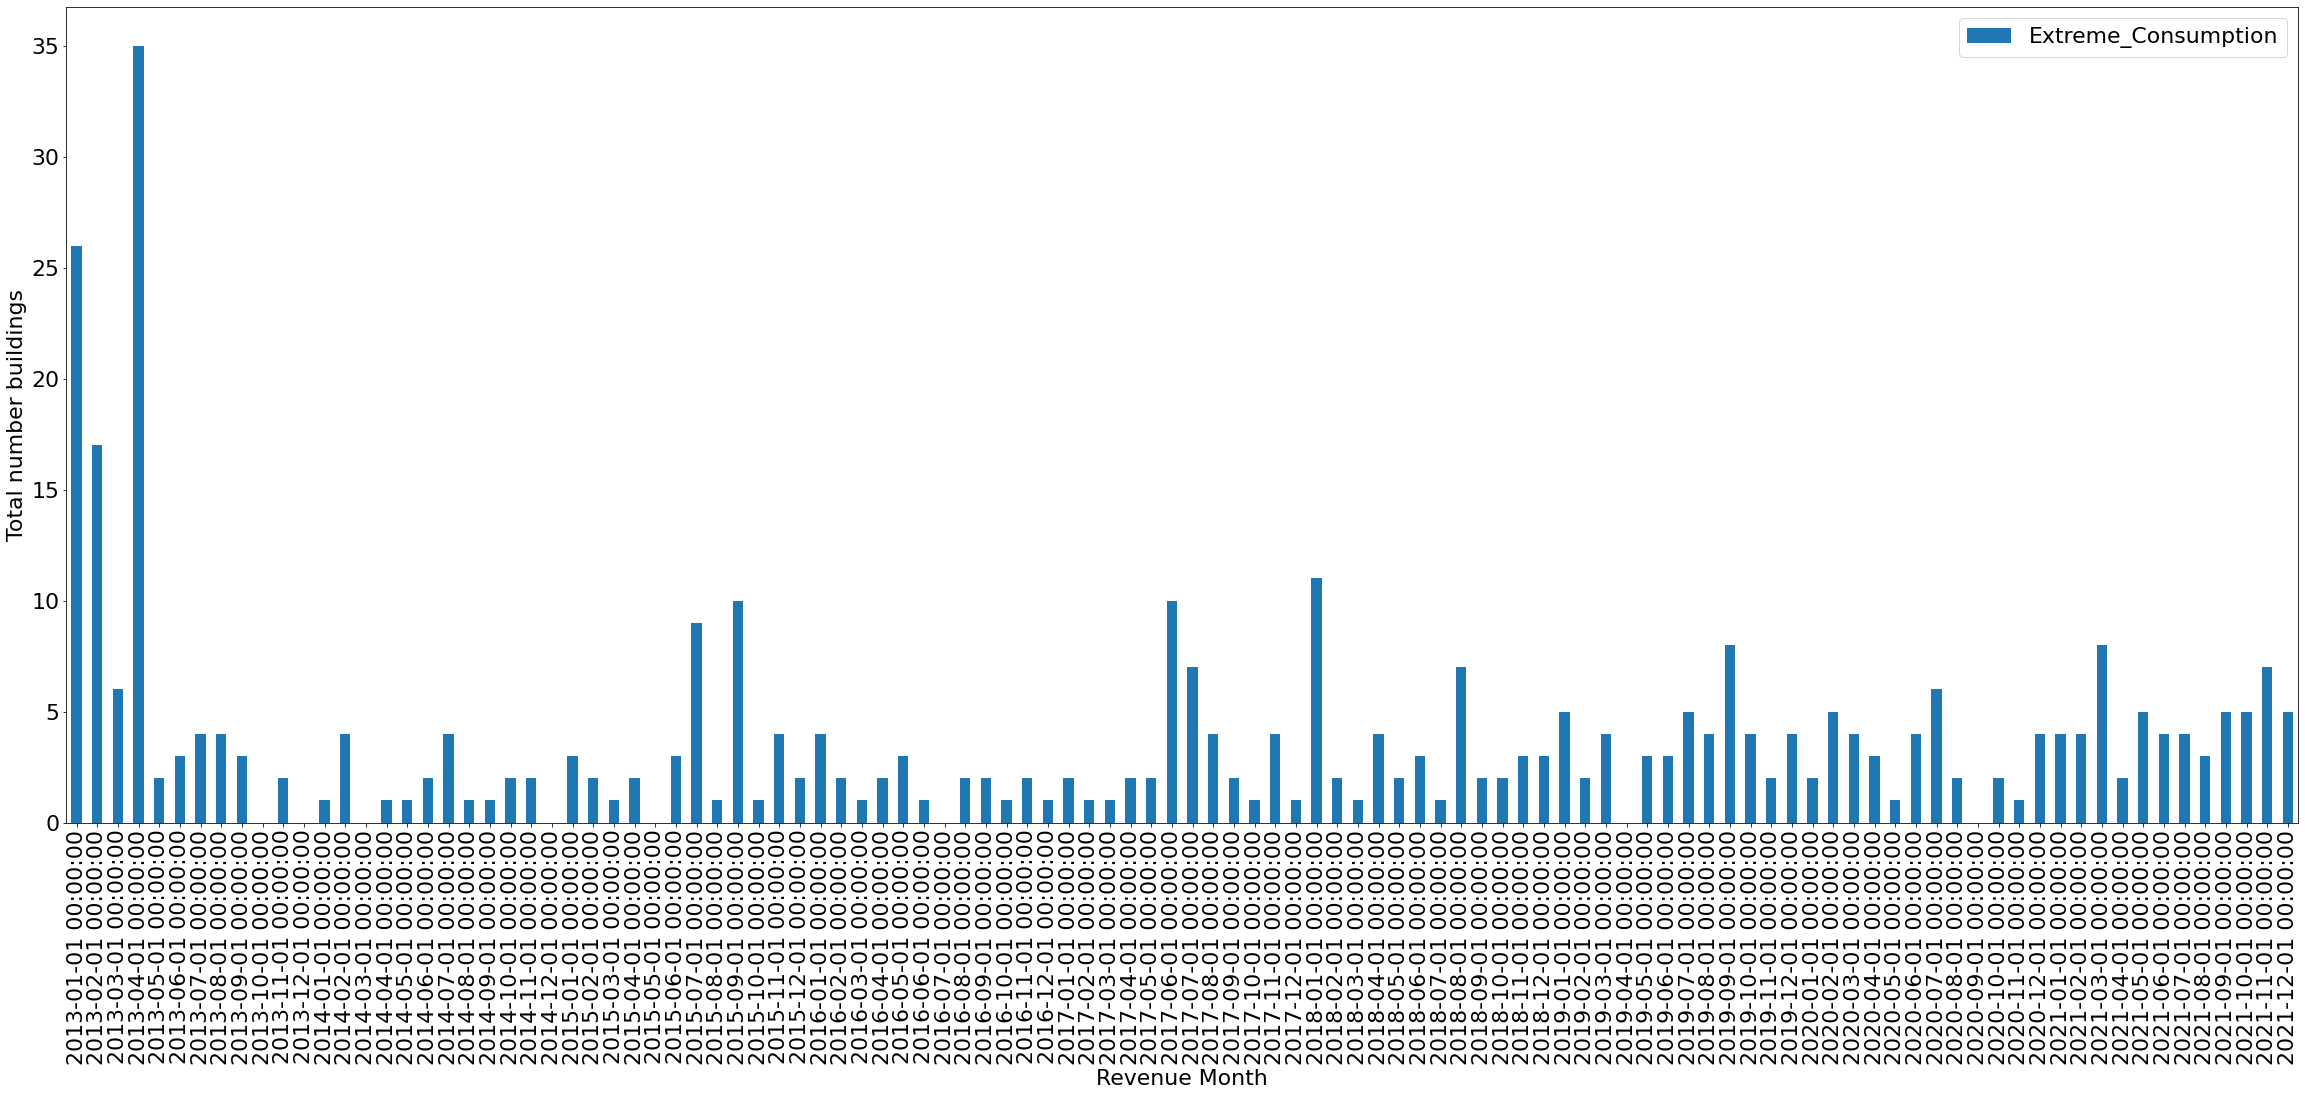

In [317]:
#Taking the average of two rows if they have same date entery values in the data set. 
manhattan_average_df_P = manhattan_imp_df_O.groupby('Revenue Month').sum()
manhattan_average_df_P['Revenue Month'] = manhattan_average_df_P.index
index=pd.RangeIndex(start=1, name='index')
plt.rcParams['figure.figsize'] = (40, 15)
manhattan_average_df_P.plot.bar(x="Revenue Month", y="Extreme_Consumption")
plt.ylabel("Total number buildings")
plt.show() # Graphing show of Current Charges
# manhattan_average_df_P


In [156]:
Total_building = manhattan_imp_df_O['Meter Number'].unique()
len(Total_building)


59

**Note** Extreme percentile is method of finding the extreme values of each buildings. Here we set our percentile to be 90% and we find out 90 percentile of the each buildings and analayze that in which year there was maximum extreme consumption. Why is that month have maximum etreme consumption. 

**R. Insering temperature for top 12 extreme months**

**Highest**

In [261]:
manhattan_imp_df_O['Flag'] = 0
manhattan_imp_df_O['Temperature']= 0

highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2013-04-01')]
highest = highest.loc[(highest['Extreme_Consumption']== 1)]
highest['Flag'] = 12 
highest['Temperature']= 52
# highest

second_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2013-01-01')]
second_highest = second_highest.loc[(second_highest['Extreme_Consumption']== 1)]
second_highest['Flag'] = 11
second_highest['Temperature']= 35
# second_highest

third_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2013-02-01')]
third_highest = third_highest.loc[(third_highest['Extreme_Consumption']== 1)]
third_highest['Flag'] = 10
third_highest['Temperature']= 34
# third_highest

fourth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2018-01-01')]
fourth_highest = fourth_highest.loc[(fourth_highest['Extreme_Consumption']== 1)]
fourth_highest['Flag'] = 9
fourth_highest['Temperature']= 33
# fourth_highest

fifth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2017-06-01')]
fifth_highest = fifth_highest.loc[(fifth_highest['Extreme_Consumption']== 1)]
fifth_highest['Flag'] = 8
fifth_highest['Temperature']= 76
# fifth_highest

sixth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2015-09-01')]
sixth_highest = sixth_highest.loc[(sixth_highest['Extreme_Consumption']== 1)]
sixth_highest['Flag'] = 7
sixth_highest['Temperature']= 74
# sixth_highest

seventh_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2015-07-01')]
seventh_highest = seventh_highest.loc[(seventh_highest['Extreme_Consumption']== 1)]
seventh_highest['Flag'] = 6
seventh_highest['Temperature']= 78
# seventh_highest 


eighth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2019-09-01')]
eighth_highest = eighth_highest.loc[(eighth_highest['Extreme_Consumption']== 1)]
eighth_highest['Flag'] = 5
eighth_highest['Temperature']= 70
# seventh_highest



nineth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2021-03-01')]
nineth_highest = nineth_highest.loc[(nineth_highest['Extreme_Consumption']== 1)]
nineth_highest['Flag'] = 4
nineth_highest['Temperature']= 76
# nineth_highest


tenth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2021-11-01')]
tenth_highest = tenth_highest.loc[(tenth_highest['Extreme_Consumption']== 1)]
tenth_highest['Flag'] = 3
tenth_highest['Temperature']= 47
# tenth_highest  


eleventh_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2018-08-01')]
eleventh_highest = eleventh_highest.loc[(eleventh_highest['Extreme_Consumption']== 1)]
eleventh_highest['Flag'] = 2 
eleventh_highest['Temperature']= 77
# eleventh_highest



twelfth_highest = manhattan_imp_df_O.loc[(manhattan_imp_df_O['Revenue Month']== '2017-07-01')]
twelfth_highest = twelfth_highest.loc[(twelfth_highest['Extreme_Consumption']== 1)]
twelfth_highest['Flag'] = 1
twelfth_highest['Temperature']= 76
# tweleth_highest  


Note: Here, we are selecting top twwleve extreme month manually and inserting their temperature. We are also giving the flag value to identify them in a such a way that we will able able to see where they are located. 

In [319]:
manhattan_highest_df_R = pd.DataFrame()
manhattan_highest_df_R=manhattan_highest_df_R.append(highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(second_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(third_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(fourth_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(fifth_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(sixth_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(seventh_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(eighth_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(nineth_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(tenth_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(eleventh_highest)
manhattan_highest_df_R=manhattan_highest_df_R.append(twelfth_highest)

Note: After getting each of the extreme months and their values, we are combining them to same data set from which we can analze different asspects of extreme consumption. 

In [263]:
len(manhattan_highest_df_R)

157

In [259]:
manhattan_highest_df_R

Meter Number Revenue Month  Current Charges  Consumption (H gallons)  \
3      V31983271    2013-04-01         23513.11             20032.831169   
3      K13203068    2013-04-01         26682.72             22733.298701   
3      A06002042    2013-04-01         12739.93             10854.233766   
3      K16795588    2013-04-01          7673.81              6537.974026   
3      I13012733    2013-04-01         13635.50             11617.246753   
3      I11009041    2013-04-01          7858.19              6695.064935   
3      K16839989    2013-04-01          2493.55              2124.467532   
3      V31665667    2013-04-01          3029.13              2580.779221   
3      V31655205    2013-04-01          7252.36              6178.909091   
3      A08000848    2013-04-01          3389.12              2887.480519   
3      V31625176    2013-04-01         12300.92             10480.207792   
3      E98161917    2013-04-01          3002.79              2558.337662   
3      V31841824    2013-04-01         16313.43             13898.805195   
3      V31665692    2013-04-01         37713.48             32413.090909   
3      V31625178    2013-04-01          4126.65              3515.844156   
3      E10052406    2013-04-01          5039.78              4293.818182   
3      I13007391    2013-04-01          4240.79              3613.090909   
3      E17794141    2013-04-01          3459.36              2947.324675   
3      V31665696    2013-04-01          6514.83              5550.545455   
3      V31625180    2013-04-01          4732.47              4032.000000   
3      V31665671    2013-04-01          6330.45              5393.454545   
3      I13007923    2013-04-01          4802.71              4091.844156   
3      V31952918    2013-04-01          1993.08              1698.077922   
3      V31665691    2013-04-01          6962.62              5932.051948   
3      V31847574    2013-04-01          5671.94              4832.415584   
3      V31946013    2013-04-01          8683.52              7398.233766   
3      V31625179    2013-04-01          4117.87              3508.363636   
3      O76882752    2013-04-01          1590.78              1241.766234   
3      E09010097    2013-04-01         12037.52             10255.792208   
3      E09010099    2013-04-01         19096.72             16270.129870   
3      I13005250    2013-04-01          7190.90              6126.545455   
3      K16838962    2013-04-01          6023.15              5131.636364   
3      I13005313    2013-04-01          6409.47              5460.779221   
3      K14834217    2013-04-01           201.94               172.051948   
3      I13011093    2013-04-01          4038.85              3441.038961   
0      K13203068    2013-01-01         34347.75             29263.792208   
0      A06002042    2013-01-01         17972.86             15312.623377   
0      K16795588    2013-01-01          9807.37              8355.740260   
0      I13012733    2013-01-01         20782.50             17706.389610   
0      E15958343    2013-01-01         20729.82             17661.506493   
0      G13031843    2013-01-01         30807.58             23354.181818   
0      V31665667    2013-01-01          4135.43              3523.324675   
0      V31655205    2013-01-01          6945.06              5917.090909   
0      V31625176    2013-01-01         13407.21             11422.753247   
0      E98161917    2013-01-01          3582.28              3052.051948   
0      V31625181    2013-01-01          7182.12              6119.064935   
0      V31625178    2013-01-01          4003.73              3411.116883   
0      E10052406    2013-01-01          6260.21              5333.610390   
0      I13007391    2013-01-01          5250.50              4473.350649   
0      K15130328    2013-01-01          4047.63              3448.519481   
0      E17794141    2013-01-01          5399.76              4600.519481   
0      V31625180    2013-01-01          6804.58     

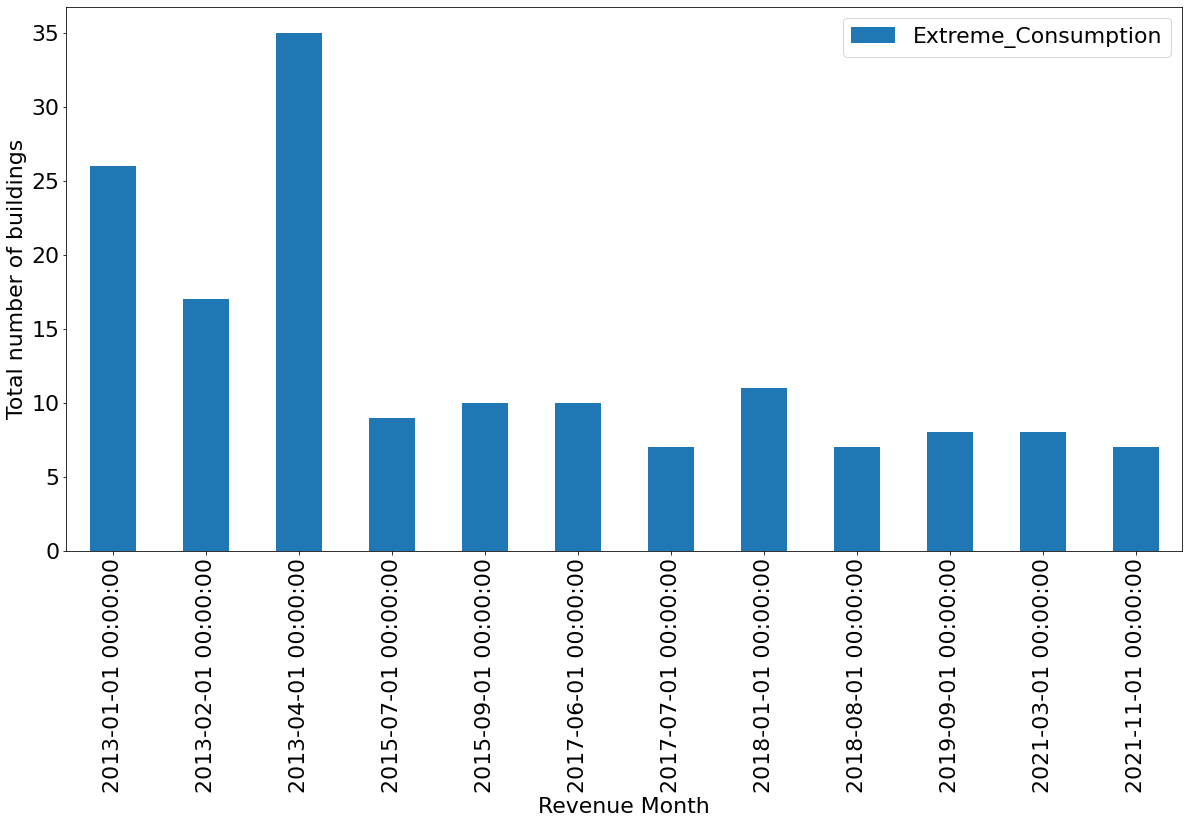

In [348]:
bb = manhattan_highest_df_R.groupby('Revenue Month').count()
bb.reset_index(inplace=True)
plt.rcParams['figure.figsize'] = (20, 10)
bb.plot.bar(x='Revenue Month', y = 'Extreme_Consumption')
plt.ylabel("Total number of buildings")
plt.show()

In [349]:
uniqueMeterNumbers_R = manhattan_highest_df_R['Meter Number'].unique()
print(len(uniqueMeterNumbers_R))
uniqueMeterNumbers_R

57


array(['V31983271', 'K13203068', 'A06002042', 'K16795588', 'I13012733',
       'I11009041', 'K16839989', 'V31665667', 'V31655205', 'A08000848',
       'V31625176', 'E98161917', 'V31841824', 'V31665692', 'V31625178',
       'E10052406', 'I13007391', 'E17794141', 'V31665696', 'V31625180',
       'V31665671', 'I13007923', 'V31952918', 'V31665691', 'V31847574',
       'V31946013', 'V31625179', 'O76882752', 'E09010097', 'E09010099',
       'I13005250', 'K16838962', 'I13005313', 'K14834217', 'I13011093',
       'E15958343', 'G13031843', 'V31625181', 'K15130328', 'E10127758',
       'E94618885', 'E13314706', 'A08000399', 'A08000393', 'V31665698',
       'G13029990', 'V83028987', 'B35397973', 'V84010435', 'G13036219',
       'E13325671', 'O76882750', 'G13023666', 'O78224452', 'V31633777',
       'O78610228', 'E12324074'], dtype=object)

In [350]:
# manhattan_Temp_Extreme = pd.DataFrame();
# for i in range(len(uniqueMeterNumbers_R)):
#     meter_number = uniqueMeterNumbers_R[i]
#     building = manhattan_highest_df_R.loc[manhattan_highest_df_R['Meter Number']== meter_number]
#     length = len(building)
#     probVal = 'Grade'
#     prob = length/12
#     if(prob<0.25):
#         probVal='Low'
#     elif(prob>=0.25 and prob<0.5):
#         probVal = 'Moderate'
#     elif(prob>=0.5 and prob<0.75):
#         probVal = 'High'
#     elif(prob>=0.5 and prob<0.75):
#         probVal = ''
#     elif(prob>=0.75 and prob<=1):
#         probVal = 'Serve'
#     building['Consumption Grade']= probVal
#     manhattan_Temp_Extreme = manhattan_Temp_Extreme.append(building)
    

Note: Here, we are finding the probality of their occurance in 12 extreme months.  

In [351]:
# manhattan_Temp_Extreme = manhattan_Temp_Extreme.sort_values(by=['Temperature'])
# manhattan_Temp_Extreme

In [352]:
# # building = manhattan_Extreme_df.loc[manhattan_Extreme_df['Consumption Grade']== 'Low']
# building = manhattan_Temp_Extreme.loc[manhattan_Temp_Extreme['Meter Number']== 'V31625176']
# building

**R1**

In [353]:
manhattan_Extreme_df = pd.DataFrame(columns=(['Meter Number', 'Total Occurance', 'Consumption Grade', 'Temp', 'Avg_temp', 'Prob']))
manhattan_Extreme_df1 = pd.DataFrame()
for i in range(len(uniqueMeterNumbers_R)):
    meter_number1 = uniqueMeterNumbers_R[i]
    building = manhattan_highest_df_R.loc[manhattan_highest_df_R['Meter Number']== meter_number1]
    length = len(building)
    probVal = 'Grade'
    prob = length/12
    if(prob<0.25):
        probVal='Low'
    elif(prob>=0.25 and prob<0.5):
        probVal = 'Moderate'
    elif(prob>=0.5 and prob<0.75):
        probVal = 'High'
    elif(prob>=0.75 and prob<=1):
        probVal = 'Serve' 
        
    list_of_temp = building['Temperature'].to_list()
    
    Avg_temp = sum(list_of_temp)/len(list_of_temp)
    manhattan_Extreme_df = manhattan_Extreme_df.append({'Meter Number': meter_number1, 'Total Occurance':  length, 'Consumption Grade': probVal, 'Temp':list_of_temp, 'Avg_temp':Avg_temp, 'Prob': prob}, ignore_index=True)




In [354]:
Total_building = manhattan_imp_df_O['Meter Number'].unique()
present_manhattan_building = manhattan_Extreme_df['Meter Number'].unique()

print(len(Total_building))
print(len(present_manhattan_building))

missing_meters = set(Total_building).difference(present_manhattan_building)
print(missing_meters)

#Remove these two lines to see missing meters 
manhattan_Extreme_df = manhattan_Extreme_df.append({'Meter Number': 'V31976211', 'Total Occurance':  0, 'Consumption Grade': 0, 'Temp': 50, 'Avg_temp':50, 'Prob': 0}, ignore_index=True)
manhattan_Extreme_df = manhattan_Extreme_df.append({'Meter Number': 'E12324074', 'Total Occurance':  0, 'Consumption Grade': 0, 'Temp':50, 'Avg_temp':50, 'Prob': 0}, ignore_index=True)
manhattan_Extreme_df = manhattan_Extreme_df.append({'Meter Number': 'K16137606', 'Total Occurance':  0, 'Consumption Grade': 0, 'Temp':50, 'Avg_temp':50, 'Prob': 0}, ignore_index=True)

print(len(manhattan_Extreme_df))

present_manhattan_Extreme_df = manhattan_Extreme_df.sort_values(by=['Total Occurance'])

print(len(present_manhattan_Extreme_df))

# manhattan_Extreme_df

59
57
{'V31976211', 'K16137606'}
60
60


In [355]:
present_manhattan_building = manhattan_Extreme_df['Meter Number'].unique()
present_manhattan_building
len(present_manhattan_building)



59

In [356]:
present_manhattan_Extreme_df

Meter Number Total Occurance Consumption Grade                  Temp  \
59    K16137606               0                 0                    50   
57    V31976211               0                 0                    50   
58    E12324074               0                 0                    50   
31    K16838962               1               Low                  [52]   
37    V31625181               1               Low                  [35]   
51    O76882750               1               Low                  [74]   
46    V83028987               1               Low                  [34]   
53    O78224452               1               Low                  [78]   
55    O78610228               1               Low                  [47]   
56    E12324074               1               Low                  [76]   
52    G13023666               1               Low                  [78]   
49    G13036219               2               Low              [76, 47]   
27    O76882752               2               Low              [52, 76]   
45    G13029990               2               Low              [34, 74]   
39    E10127758               2               Low              [35, 77]   
38    K15130328               2               Low              [35, 47]   
34    I13011093               2               Low              [52, 35]   
18    V31665696               2               Low              [52, 33]   
29    E09010099               2               Low              [52, 76]   
1     K13203068               2               Low              [52, 35]   
5     I11009041               2               Low              [52, 34]   
6     K16839989               2               Low              [52, 34]   
16    I13007391               2               Low              [52, 35]   
17    E17794141               2               Low              [52, 35]   
9     A08000848               2               Low              [52, 34]   
8     V31655205               2               Low              [52, 35]   
10    V31625176               3          Moderate          [52, 35, 76]   
40    E94618885               3          Moderate          [35, 33, 70]   
41    E13314706               3          Moderate          [34, 33, 76]   
42    A08000399               3          Moderate          [34, 33, 70]   
43    A08000393               3          Moderate          [34, 70, 47]   
7     V31665667               3          Moderate          [52, 35, 74]   
50    E13325671               3          Moderate          [74, 78, 70]   
54    V31633777               3          Moderate          [76, 47, 77]   
3     K16795588               3          Moderate          [52, 35, 47]   
2     A06002042               3          Moderate          [52, 35, 33]   
47    B35397973               3          Moderate          [33, 76, 76]   
11    E98161917               3          Moderate          [52, 35, 33]   
0     V31983271               3          Moderate          [52, 34, 76]   
36    G13031843               3          Moderate          [35, 70, 77]   
21    I13007923               3          Moderate          [52, 35, 34]   
22    V31952918               3          Moderate          [52, 74, 78]   
12    V31841824               3          Moderate          [52, 74, 70]   
28    E09010097               3          Moderate          [52, 70, 47]   
33    K14834217               3          Moderate          [52, 76, 77]   
13    V31665692               3          Moderate          [52, 78, 76]   
35    E15958343               3          Moderate          [35, 34, 76]   
32    I13005313               3          Moderate          [52, 35, 34]   
44    V31665698               4          Moderate      [34, 74, 78, 77]   
14    V31625178               4          Moderate      [52, 35, 76, 76]   
48    V84010435               4          Moderate      [76, 74, 78, 76]   
26    V31625179               4          Moderate      [52, 34, 33, 76]   
25    V31946013             

**R2--------------------**

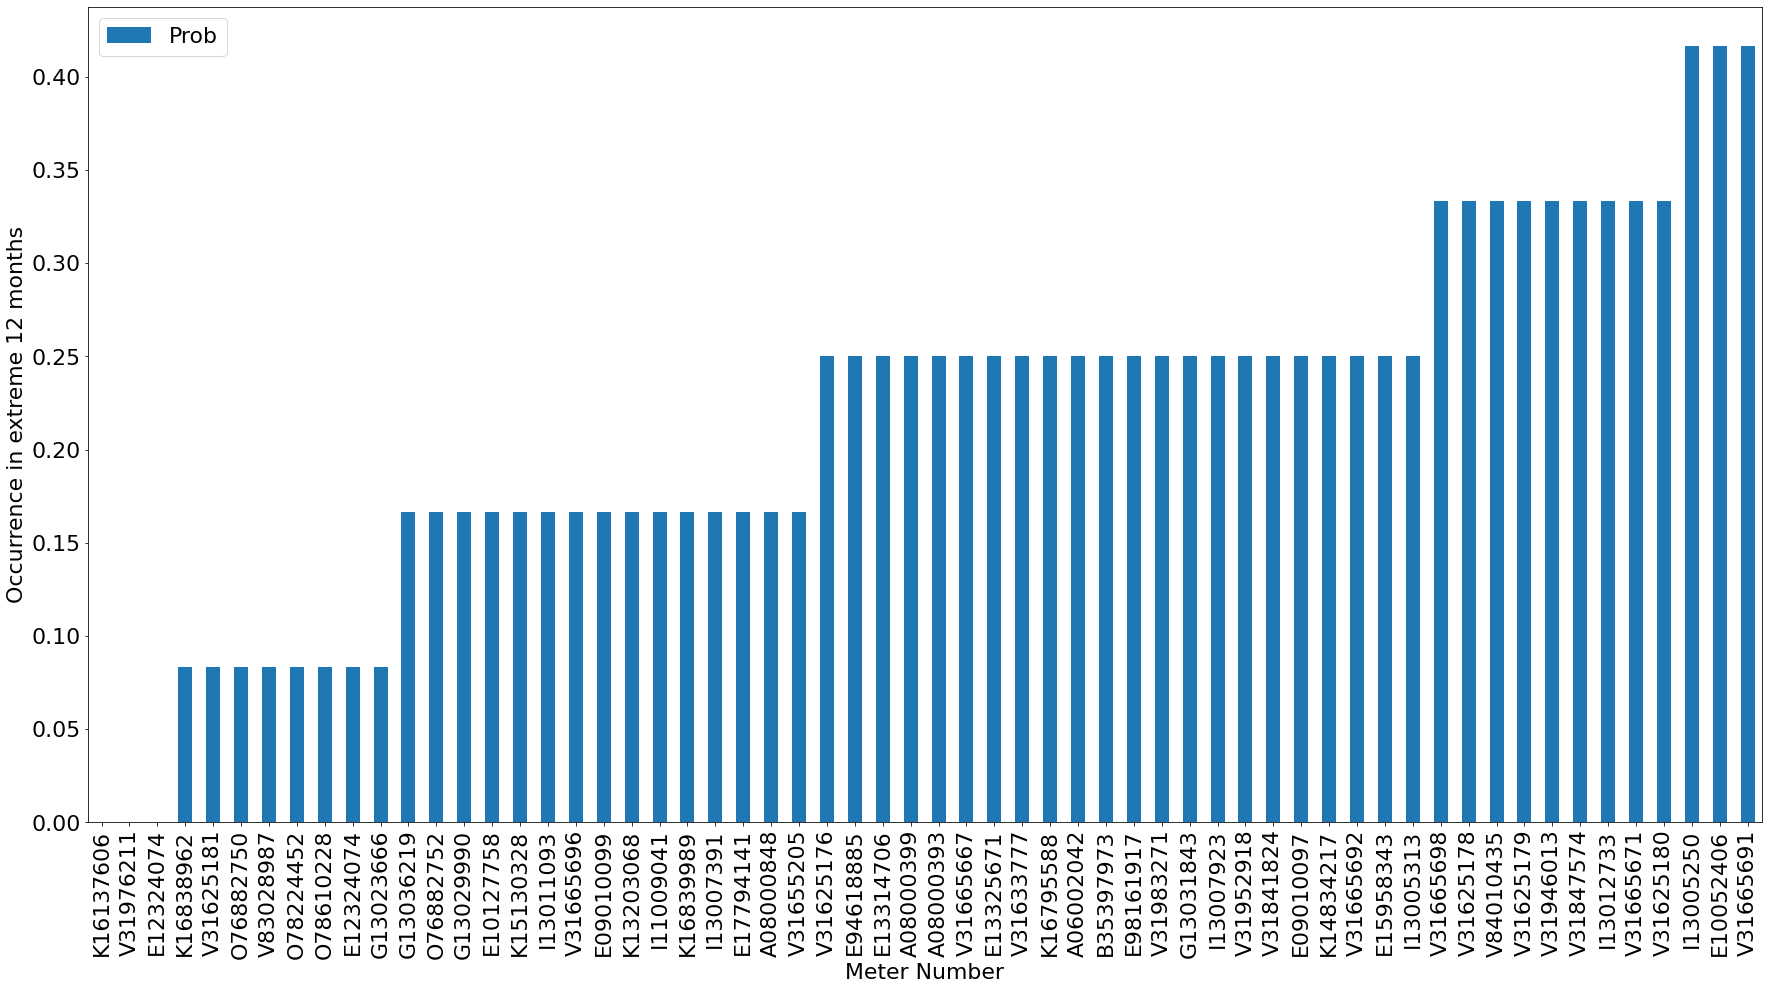

In [357]:
plt.rcParams['figure.figsize'] = (30, 15)
present_manhattan_Extreme_df.plot.bar(y="Prob", x="Meter Number")
plt.ylabel("Occurrence in extreme 12 months")
plt.show() 

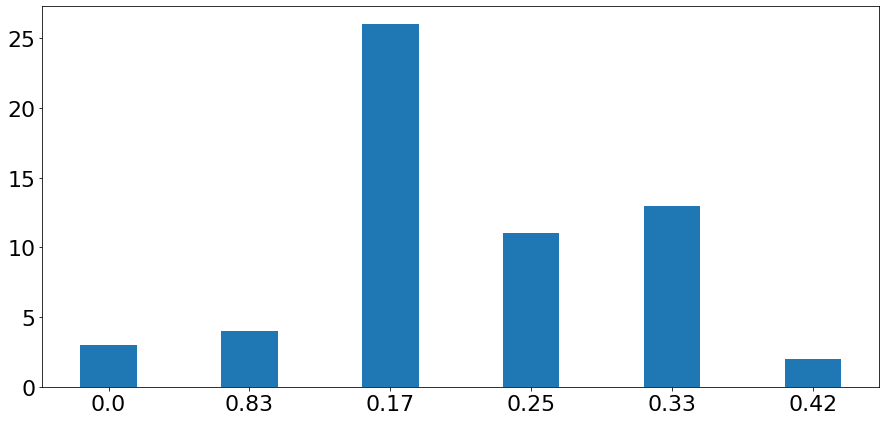

Prob
0.000000     3
0.083333     8
0.166667    15
0.250000    22
0.333333     9
0.416667     3
Name: Prob, dtype: int64

In [358]:
prob_count = present_manhattan_Extreme_df.groupby(['Prob'])['Prob'].count()
plt.rcParams['figure.figsize'] = (15, 7)
# prob_count.plot.bar(x=["Prob"], y="count")
# plt.show()

x = [0.00, 0.83, 0.17, 0.25, 0.33, 0.42]
y = [3,4,26,11, 13, 2]
numbers = [0, 1,2,3,4,5]


plt.bar(numbers, y, tick_label = x,width = 0.4)

plt.show()

prob_count


**R3 Box Plot** 

<AxesSubplot:>

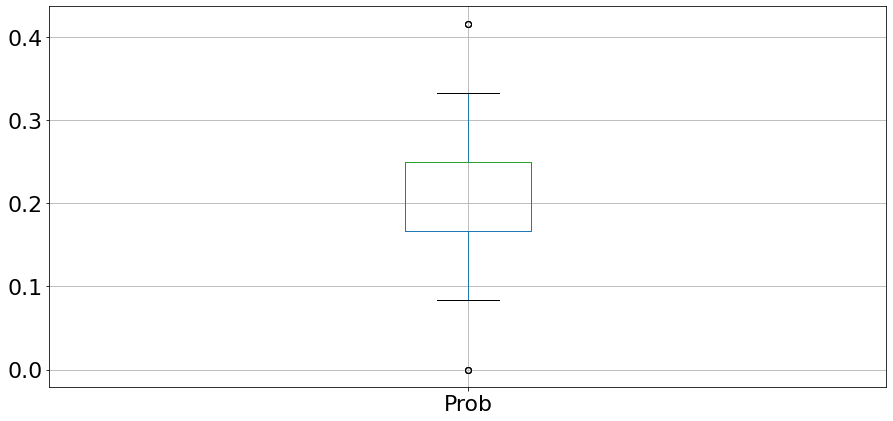

In [359]:


present_manhattan_Extreme_df["Prob"]=present_manhattan_Extreme_df["Prob"].astype(float)

# present_manhattan_Extreme_df["Avg_temp"]=present_manhattan_Extreme_df["Avg_temp"].astype(float)


present_manhattan_Extreme_df.boxplot(column=["Prob"])

# present_manhattan_Extreme_df['Avg_temp']
# present_manhattan_Extreme_df["Prob"]


# plt.show()

**R-4 Inserting Zip Code**

In [360]:
present_manhattan_Extreme_df['Zip_code'] = 'null'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K16137606', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='G13029990', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='O78610228', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E12324074', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E13325671', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='G13031843', 'Zip_code'] = '10009'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='O78224452', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31633777', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='G13023666', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E13314706', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31625179', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='B35397973', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='G13036219', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V84010435', 'Zip_code'] = '10039'


present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E15958343', 'Zip_code'] = '10009'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31976211', 'Zip_code'] = '10035'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V83028987', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='O76882752', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31665698', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='A08000393', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='A08000399', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E94618885', 'Zip_code'] = '10024'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E10127758', 'Zip_code'] = '10024'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='O76882750', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K15130328', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31625181', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E98161917', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I13011093', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K14834217', 'Zip_code'] = '10029'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I13005313', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K16838962', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I13005250', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E09010099', 'Zip_code'] = '10035'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E09010097', 'Zip_code'] = '10035'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31946013', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31847574', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31665691', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31952918', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I13007923', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31665671', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31625180', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31665696', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E17794141', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I13007391', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='E10052406', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31625178', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31665692', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31841824', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31625176', 'Zip_code'] = '10030'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='A08000848', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31655205', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31665667', 'Zip_code'] = '10030'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K16839989', 'Zip_code'] = '10027'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I11009041', 'Zip_code'] = '10009'

present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='I13012733', 'Zip_code'] = '10009'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K16795588', 'Zip_code'] = '10009'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='A06002042', 'Zip_code'] = '10009'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='K13203068', 'Zip_code'] = '10029'
present_manhattan_Extreme_df.loc[present_manhattan_Extreme_df['Meter Number']=='V31983271', 'Zip_code'] = '10026'


present_manhattan_Extreme_df

Meter Number Total Occurance Consumption Grade                  Temp  \
59    K16137606               0                 0                    50   
57    V31976211               0                 0                    50   
58    E12324074               0                 0                    50   
31    K16838962               1               Low                  [52]   
37    V31625181               1               Low                  [35]   
51    O76882750               1               Low                  [74]   
46    V83028987               1               Low                  [34]   
53    O78224452               1               Low                  [78]   
55    O78610228               1               Low                  [47]   
56    E12324074               1               Low                  [76]   
52    G13023666               1               Low                  [78]   
49    G13036219               2               Low              [76, 47]   
27    O76882752               2               Low              [52, 76]   
45    G13029990               2               Low              [34, 74]   
39    E10127758               2               Low              [35, 77]   
38    K15130328               2               Low              [35, 47]   
34    I13011093               2               Low              [52, 35]   
18    V31665696               2               Low              [52, 33]   
29    E09010099               2               Low              [52, 76]   
1     K13203068               2               Low              [52, 35]   
5     I11009041               2               Low              [52, 34]   
6     K16839989               2               Low              [52, 34]   
16    I13007391               2               Low              [52, 35]   
17    E17794141               2               Low              [52, 35]   
9     A08000848               2               Low              [52, 34]   
8     V31655205               2               Low              [52, 35]   
10    V31625176               3          Moderate          [52, 35, 76]   
40    E94618885               3          Moderate          [35, 33, 70]   
41    E13314706               3          Moderate          [34, 33, 76]   
42    A08000399               3          Moderate          [34, 33, 70]   
43    A08000393               3          Moderate          [34, 70, 47]   
7     V31665667               3          Moderate          [52, 35, 74]   
50    E13325671               3          Moderate          [74, 78, 70]   
54    V31633777               3          Moderate          [76, 47, 77]   
3     K16795588               3          Moderate          [52, 35, 47]   
2     A06002042               3          Moderate          [52, 35, 33]   
47    B35397973               3          Moderate          [33, 76, 76]   
11    E98161917               3          Moderate          [52, 35, 33]   
0     V31983271               3          Moderate          [52, 34, 76]   
36    G13031843               3          Moderate          [35, 70, 77]   
21    I13007923               3          Moderate          [52, 35, 34]   
22    V31952918               3          Moderate          [52, 74, 78]   
12    V31841824               3          Moderate          [52, 74, 70]   
28    E09010097               3          Moderate          [52, 70, 47]   
33    K14834217               3          Moderate          [52, 76, 77]   
13    V31665692               3          Moderate          [52, 78, 76]   
35    E15958343               3          Moderate          [35, 34, 76]   
32    I13005313               3          Moderate          [52, 35, 34]   
44    V31665698               4          Moderate      [34, 74, 78, 77]   
14    V31625178               4          Moderate      [52, 35, 76, 76]   
48    V84010435               4          Moderate      [76, 74, 78, 76]   
26    V31625179               4          Moderate      [52, 34, 33, 76]   
25    V31946013             

In [361]:
# present_manhattan_Extreme_df["Zip_code"]

**R-6 Calculating average Probaility and Temp of each zip code**

  Zip_code      Prob   Avg_temp
0    10009  0.250000  49.069444
1    10024  0.208333  51.000000
2    10026  0.250000  54.000000
3    10027  0.166667  43.000000
4    10029  0.212963  51.837037
5    10030  0.213964  54.920721
6    10035  0.138889  56.777778
7    10039  0.333333  76.000000


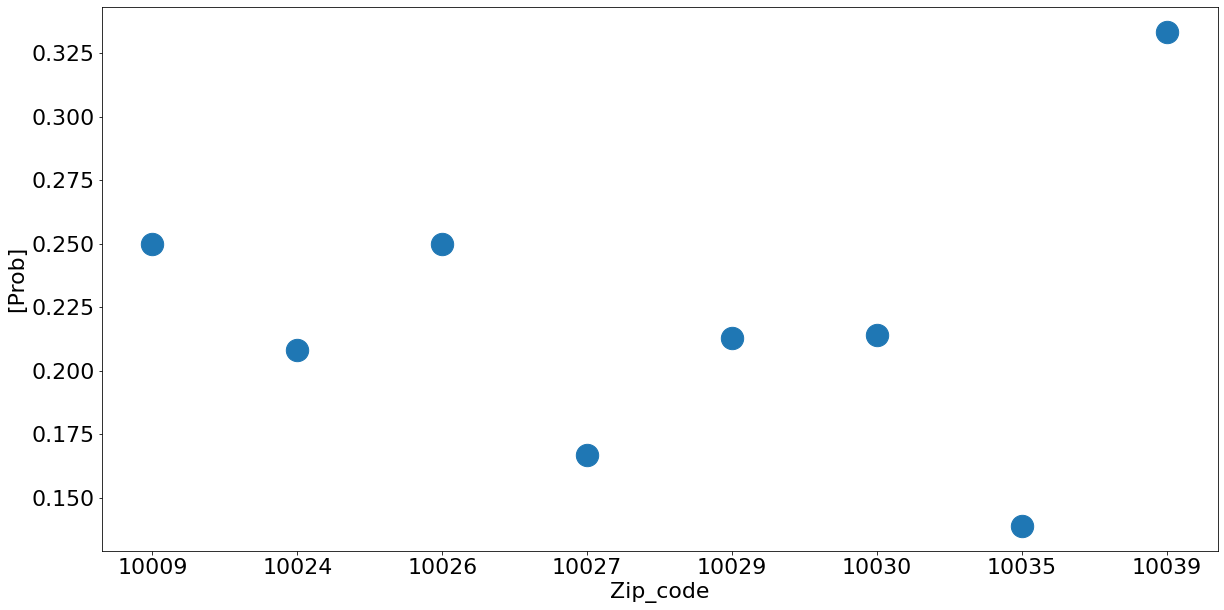

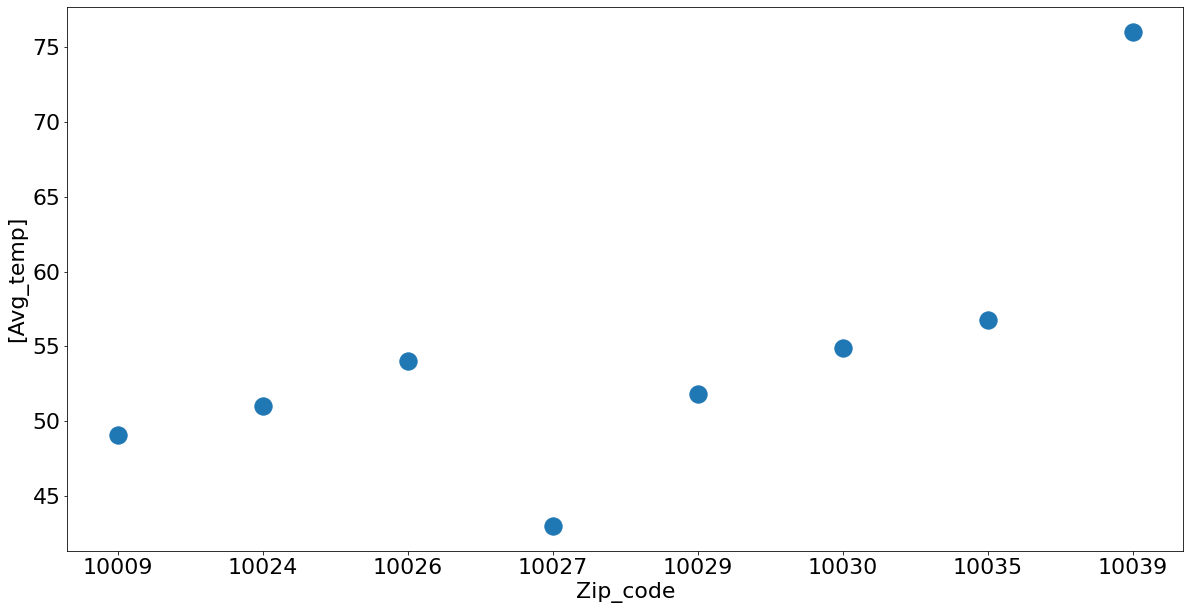

In [362]:
aa = present_manhattan_Extreme_df.groupby('Zip_code')['Prob', 'Avg_temp'].agg('mean')
aa.reset_index(inplace=True)
print(aa)
plt.rcParams['figure.figsize'] = (20, 10)
aa.plot.scatter(y=["Prob"], x="Zip_code", s=500)
plt.show()
aa.plot.scatter(y=["Avg_temp"], x="Zip_code", s=300)
plt.show()

**R-6 Calculating occurance of buildings in each zip code** 

  Zip_code  Prob  Avg_temp
0    10009     6         6
1    10024     2         2
2    10026     1         1
3    10027     1         1
4    10029     9         9
5    10030    37        37
6    10035     3         3
7    10039     1         1


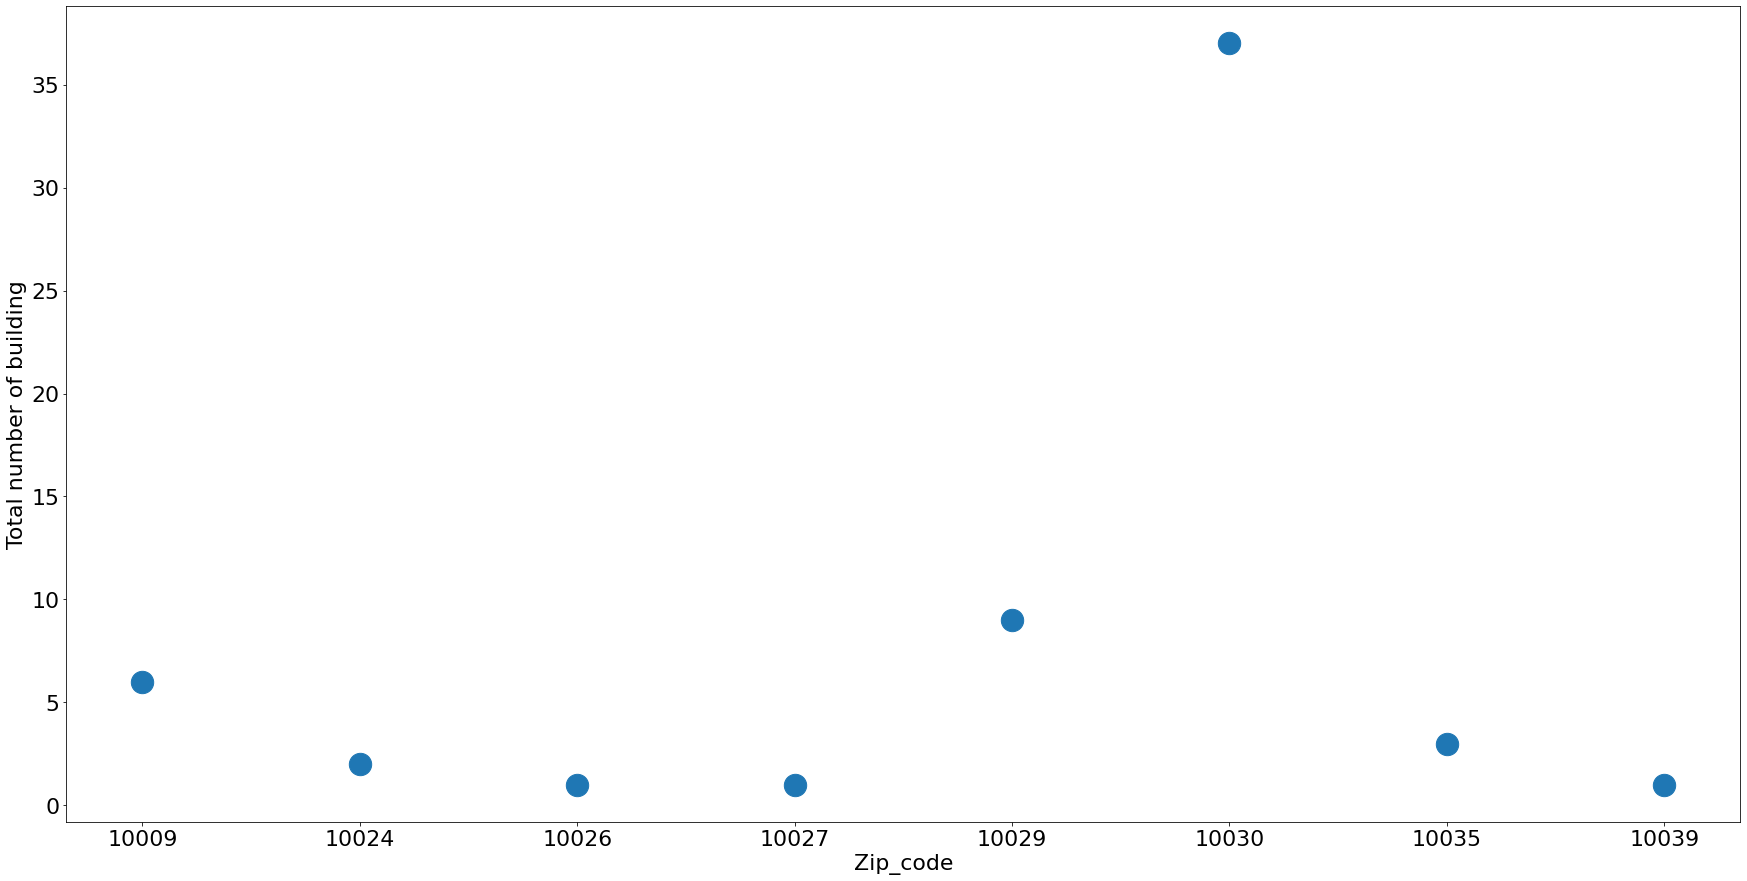

In [376]:
aa = present_manhattan_Extreme_df.groupby('Zip_code')['Prob', 'Avg_temp'].count()
aa.reset_index(inplace=True)
print(aa)
aa.plot.scatter(y=["Prob"], x="Zip_code", s=500)
plt.ylabel("Total number of building")
plt.show()


In [364]:
# import pgeocode
# nomi = pgeocode.Nominatim("us")

# dfzip = aa["Zip_code"].apply(lambda x:nomi.query_postal_code(x))
# aa = pd.concat([aa, dfzip], axis="columns")
# aa




**R-7 visualization of occurance of extreme building in each zipcode graphically**

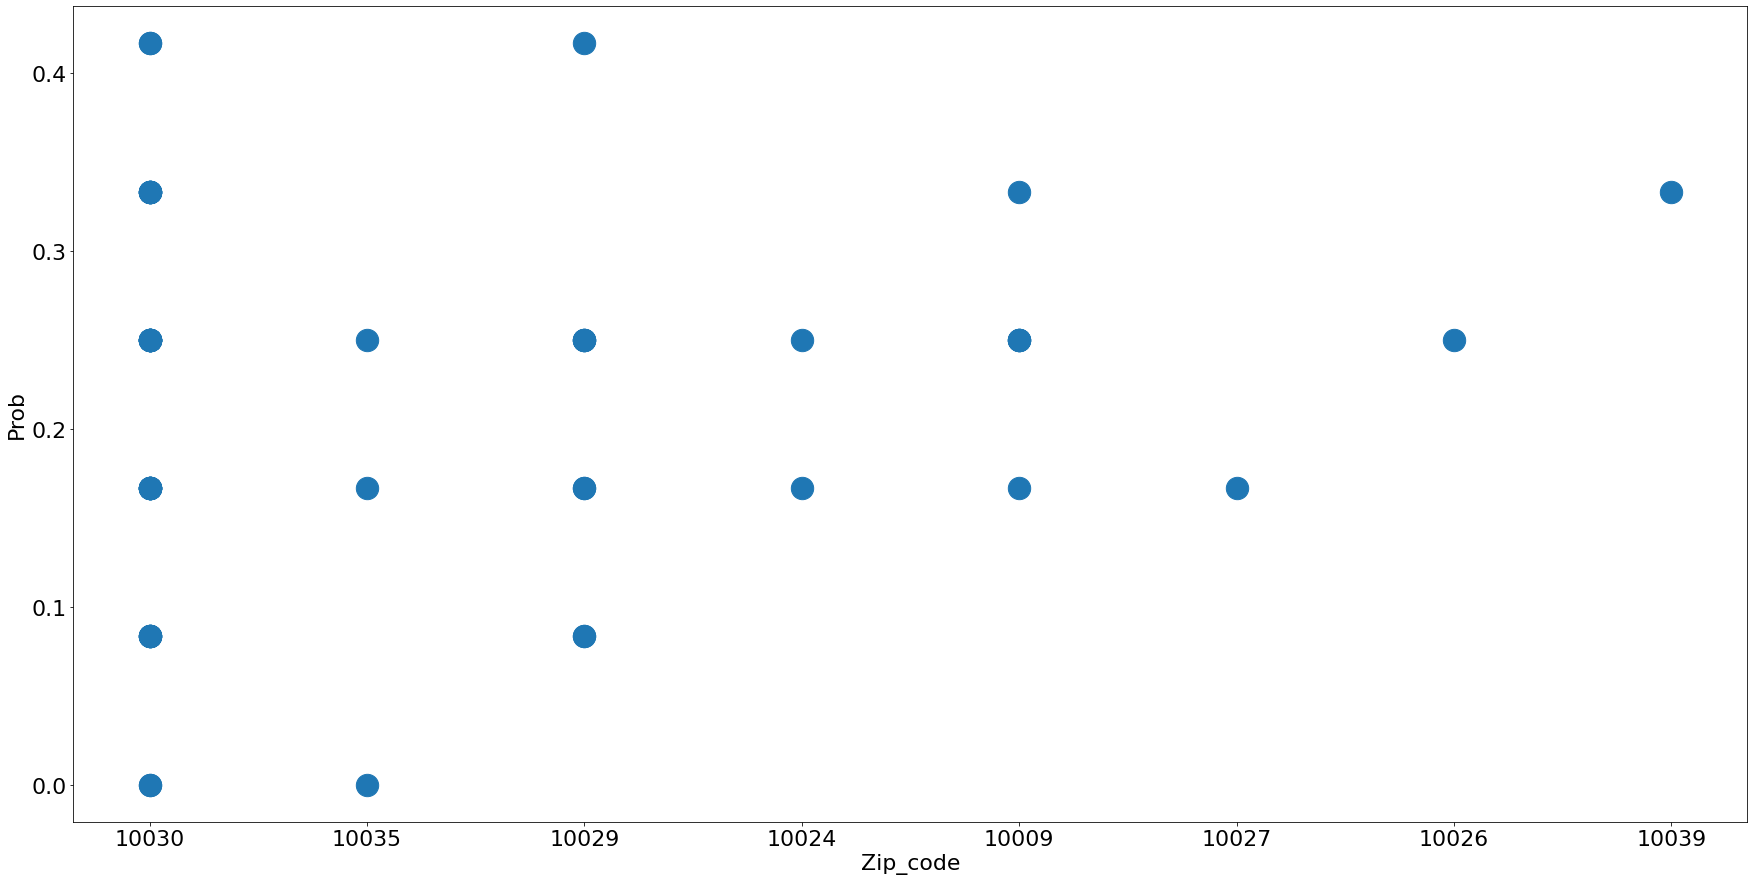

In [365]:
plt.rcParams['figure.figsize'] = (30, 15)
present_manhattan_Extreme_df.plot.scatter(y="Prob", x="Zip_code", s=500)
# plt.yticks(fontsize=24)
# plt.xticks(fontsize=24)

font = {'family' : 'normal',
        'size'   : 24}
plt.rc('font', **font)

plt.show()

**S. Trend Analysis**

In [366]:
count = 0
count1 = 0
count2  = 0
import seaborn
pos_sig = 0
sig =0
neg_sig =0 
no_sig =0
manhattan_Trend_df = pd.DataFrame(columns=(['Meter Number', 'Significance', 'slope_coefficient']))


from datetime import date
for i in range(len(uniqueMeterNumbers_f)):
    meter_number1 = uniqueMeterNumbers_f[i]
    
    building = manhattan_imp_df_h.loc[manhattan_imp_df_h['Meter Number']==meter_number1]
    building = building[['Revenue Month','Consumption (H gallons)']]
    building = building.sort_values(by='Revenue Month')
    
    #To draw the regration graph 
    
#     building['date_ordinal'] = pd.to_datetime(building['Revenue Month']).apply(lambda date: date.toordinal())

#     ax = seaborn.regplot(
#     data=building,
#     x='date_ordinal',
#     y='Consumption (H gallons)',
#     )
#     # Tighten up the axes for prettiness
#     ax.set_xlim(building['date_ordinal'].min() - 1, building['date_ordinal'].max() + 1)
#     ax.set_ylim(0, building['Consumption (H gallons)'].max() + 1)
    
#     ax.set_xlabel('Revenue Month')
#     new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
#     ax.set_xticklabels(new_labels)
#     plt.show()
    
    #To calculate the regresssion 
    
    y=np.array(building['Consumption (H gallons)'].dropna().values, dtype=float)
    x=np.array(pd.to_datetime(building['Consumption (H gallons)'].dropna()).index.values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    xf = np.linspace(min(x),max(x),100)
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
#     print('slope =',slope, 'r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
    
    
#     if (r_value > 0):
#         count += 1
#     elif(r_value==0):
#         count1 += 1
#     else: 
#         count2 += 1
                                      
    if(p_value<0.05):
#         Significant = 'Significant'
        if(r_value>0):
            Significant = 'Positive Significant'
            pos_sig +=1
        elif(r_value<0):
            Significant = 'Negative Significant'
            neg_sig +=1
        else:
            Significant = 'Neutral'
            sig +=1 
            
    else:
        if(r_value>0):
                Significant = 'No_Significant(Positive)'
        else:
            Significant = 'No_Significant(Negative)'
            
#         no_sig +=1
    
    
    manhattan_Trend_df = manhattan_Trend_df.append({'Meter Number': meter_number1, 'Significance': Significant, 'slope_coefficient': r_value}, ignore_index=True)


In [367]:
manhattan_Trend_df
# manhattan_Trend_df = manhattan_Trend_df.sort_values(by=['Significance'])
# manhattan_Trend_df

Meter Number              Significance  slope_coefficient
0     V31983271  No_Significant(Negative)          -0.048678
1     E13325671  No_Significant(Positive)           0.144955
2     E13314706  No_Significant(Positive)           0.006188
3     K13203068  No_Significant(Positive)           0.031032
4     A06002042      Negative Significant          -0.255425
5     K16795588      Positive Significant           0.215877
6     I13012733      Negative Significant          -0.272659
7     E15958343  No_Significant(Positive)           0.031767
8     I11009041  No_Significant(Negative)          -0.134627
9     G13031843      Negative Significant          -0.235032
10    K16839989      Negative Significant          -0.344913
11    V84010435      Negative Significant          -0.415065
12    V31665667      Negative Significant          -0.562905
13    G13036219  No_Significant(Positive)           0.011844
14    V31655205  No_Significant(Negative)          -0.175314
15    A08000399  No_Significant(Positive)           0.143562
16    A08000848  No_Significant(Negative)          -0.051014
17    K16137606  No_Significant(Positive)           0.075466
18    V31625176      Negative Significant          -0.261135
19    E98161917      Positive Significant           0.229210
20    V31841824  No_Significant(Negative)          -0.087385
21    V31625181  No_Significant(Positive)           0.140010
22    V31665692  No_Significant(Negative)          -0.032133
23    V31625178  No_Significant(Negative)          -0.050835
24    E10052406  No_Significant(Negative)          -0.145753
25    I13007391  No_Significant(Negative)          -0.115536
26    K15130328  No_Significant(Positive)           0.040897
27    E17794141  No_Significant(Negative)          -0.004199
28    V31633777      Positive Significant           0.343550
29    V31665696  No_Significant(Positive)           0.114086
30    O78610228      Positive Significant           0.222938
31    V31625180  No_Significant(Negative)          -0.069224
32    A08000393      Positive Significant           0.516264
33    V31665671  No_Significant(Negative)          -0.151874
34    V31665698      Negative Significant          -0.189397
35    I13007923  No_Significant(Negative)          -0.184558
36    V31952918      Negative Significant          -0.195660
37    V31665691      Negative Significant          -0.191254
38    G13023666      Negative Significant          -0.269594
39    V31847574      Negative Significant          -0.427436
40    V31946013      Negative Significant          -0.191952
41    V31625179  No_Significant(Positive)           0.015569
42    G13029990  No_Significant(Negative)          -0.029623
43    B35397973      Positive Significant           0.196146
44    O78224452  No_Significant(Positive)           0.102754
45    E12324074  No_Significant(Negative)          -0.046391
46    O76882750  No_Significant(Negative)          -0.077292
47    O76882752  No_Significant(Negative)          -0.177222
48    V83028987  No_Significant(Negative)          -0.062198
49    E10127758      Positive Significant           0.237720
50    V31976211  No_Significant(Negative)          -0.033817
51    E09010097      Positive Significant           0.200885
52    E09010099  No_Significant(Positive)           0.112329
53    E94618885  No_Significant(Positive)           0.131580
54    I13005250  No_Significant(Negative)          -0.140456
55    K16838962  No_Significant(Negative)          -0.129687
56    I13005313  No_Significant(Negative)          -0.084902
57    K14834217  No_Significant(Negative)          -0.162685
58    I13011093      Negative Significant          -0.216822

In [368]:
present_manhattan_Extreme_df

Meter Number Total Occurance Consumption Grade                  Temp  \
59    K16137606               0                 0                    50   
57    V31976211               0                 0                    50   
58    E12324074               0                 0                    50   
31    K16838962               1               Low                  [52]   
37    V31625181               1               Low                  [35]   
51    O76882750               1               Low                  [74]   
46    V83028987               1               Low                  [34]   
53    O78224452               1               Low                  [78]   
55    O78610228               1               Low                  [47]   
56    E12324074               1               Low                  [76]   
52    G13023666               1               Low                  [78]   
49    G13036219               2               Low              [76, 47]   
27    O76882752               2               Low              [52, 76]   
45    G13029990               2               Low              [34, 74]   
39    E10127758               2               Low              [35, 77]   
38    K15130328               2               Low              [35, 47]   
34    I13011093               2               Low              [52, 35]   
18    V31665696               2               Low              [52, 33]   
29    E09010099               2               Low              [52, 76]   
1     K13203068               2               Low              [52, 35]   
5     I11009041               2               Low              [52, 34]   
6     K16839989               2               Low              [52, 34]   
16    I13007391               2               Low              [52, 35]   
17    E17794141               2               Low              [52, 35]   
9     A08000848               2               Low              [52, 34]   
8     V31655205               2               Low              [52, 35]   
10    V31625176               3          Moderate          [52, 35, 76]   
40    E94618885               3          Moderate          [35, 33, 70]   
41    E13314706               3          Moderate          [34, 33, 76]   
42    A08000399               3          Moderate          [34, 33, 70]   
43    A08000393               3          Moderate          [34, 70, 47]   
7     V31665667               3          Moderate          [52, 35, 74]   
50    E13325671               3          Moderate          [74, 78, 70]   
54    V31633777               3          Moderate          [76, 47, 77]   
3     K16795588               3          Moderate          [52, 35, 47]   
2     A06002042               3          Moderate          [52, 35, 33]   
47    B35397973               3          Moderate          [33, 76, 76]   
11    E98161917               3          Moderate          [52, 35, 33]   
0     V31983271               3          Moderate          [52, 34, 76]   
36    G13031843               3          Moderate          [35, 70, 77]   
21    I13007923               3          Moderate          [52, 35, 34]   
22    V31952918               3          Moderate          [52, 74, 78]   
12    V31841824               3          Moderate          [52, 74, 70]   
28    E09010097               3          Moderate          [52, 70, 47]   
33    K14834217               3          Moderate          [52, 76, 77]   
13    V31665692               3          Moderate          [52, 78, 76]   
35    E15958343               3          Moderate          [35, 34, 76]   
32    I13005313               3          Moderate          [52, 35, 34]   
44    V31665698               4          Moderate      [34, 74, 78, 77]   
14    V31625178               4          Moderate      [52, 35, 76, 76]   
48    V84010435               4          Moderate      [76, 74, 78, 76]   
26    V31625179               4          Moderate      [52, 34, 33, 76]   
25    V31946013             

In [369]:
manhattan_final = pd.merge(present_manhattan_Extreme_df.reset_index(), manhattan_Trend_df.reset_index(), how='inner', on=['Meter Number'])
manhattan_final

index_x Meter Number Total Occurance Consumption Grade  \
0        59    K16137606               0                 0   
1        57    V31976211               0                 0   
2        58    E12324074               0                 0   
3        56    E12324074               1               Low   
4        31    K16838962               1               Low   
5        37    V31625181               1               Low   
6        51    O76882750               1               Low   
7        46    V83028987               1               Low   
8        53    O78224452               1               Low   
9        55    O78610228               1               Low   
10       52    G13023666               1               Low   
11       49    G13036219               2               Low   
12       27    O76882752               2               Low   
13       45    G13029990               2               Low   
14       39    E10127758               2               Low   
15       38    K15130328               2               Low   
16       34    I13011093               2               Low   
17       18    V31665696               2               Low   
18       29    E09010099               2               Low   
19        1    K13203068               2               Low   
20        5    I11009041               2               Low   
21        6    K16839989               2               Low   
22       16    I13007391               2               Low   
23       17    E17794141               2               Low   
24        9    A08000848               2               Low   
25        8    V31655205               2               Low   
26       10    V31625176               3          Moderate   
27       40    E94618885               3          Moderate   
28       41    E13314706               3          Moderate   
29       42    A08000399               3          Moderate   
30       43    A08000393               3          Moderate   
31        7    V31665667               3          Moderate   
32       50    E13325671               3          Moderate   
33       54    V31633777               3          Moderate   
34        3    K16795588               3          Moderate   
35        2    A06002042               3          Moderate   
36       47    B35397973               3          Moderate   
37       11    E98161917               3          Moderate   
38        0    V31983271               3          Moderate   
39       36    G13031843               3          Moderate   
40       21    I13007923               3          Moderate   
41       22    V31952918               3          Moderate   
42       12    V31841824               3          Moderate   
43       28    E09010097               3          Moderate   
44       33    K14834217               3          Moderate   
45       13    V31665692               3          Moderate   
46       35    E15958343               3          Moderate   
47       32    I13005313               3          Moderate   
48       44    V31665698               4          Moderate   
49       14    V31625178               4          Moderate   
50       48    V84010435               4          Moderate   
51       26    V31625179               4          Moderate   
52       25    V31946013               4          Moderate   
53       24    V31847574               4          Moderate   
54        4    I13012733               4          Moderate   
55       20    V31665671               4          Moderate   
56       19    V31625180               4          Moderate   
57       30    I13005250               5          Moderate   
58       15    E10052406               5          Moderate   
59       23    V31665691               5          Moderate   

                    Temp   Avg_temp      Prob Zip_code  index_y  \
0                     50  50.000000  0.000000    10030       17   
1                     50  50.000000  0.000000    10035       50   
2                   

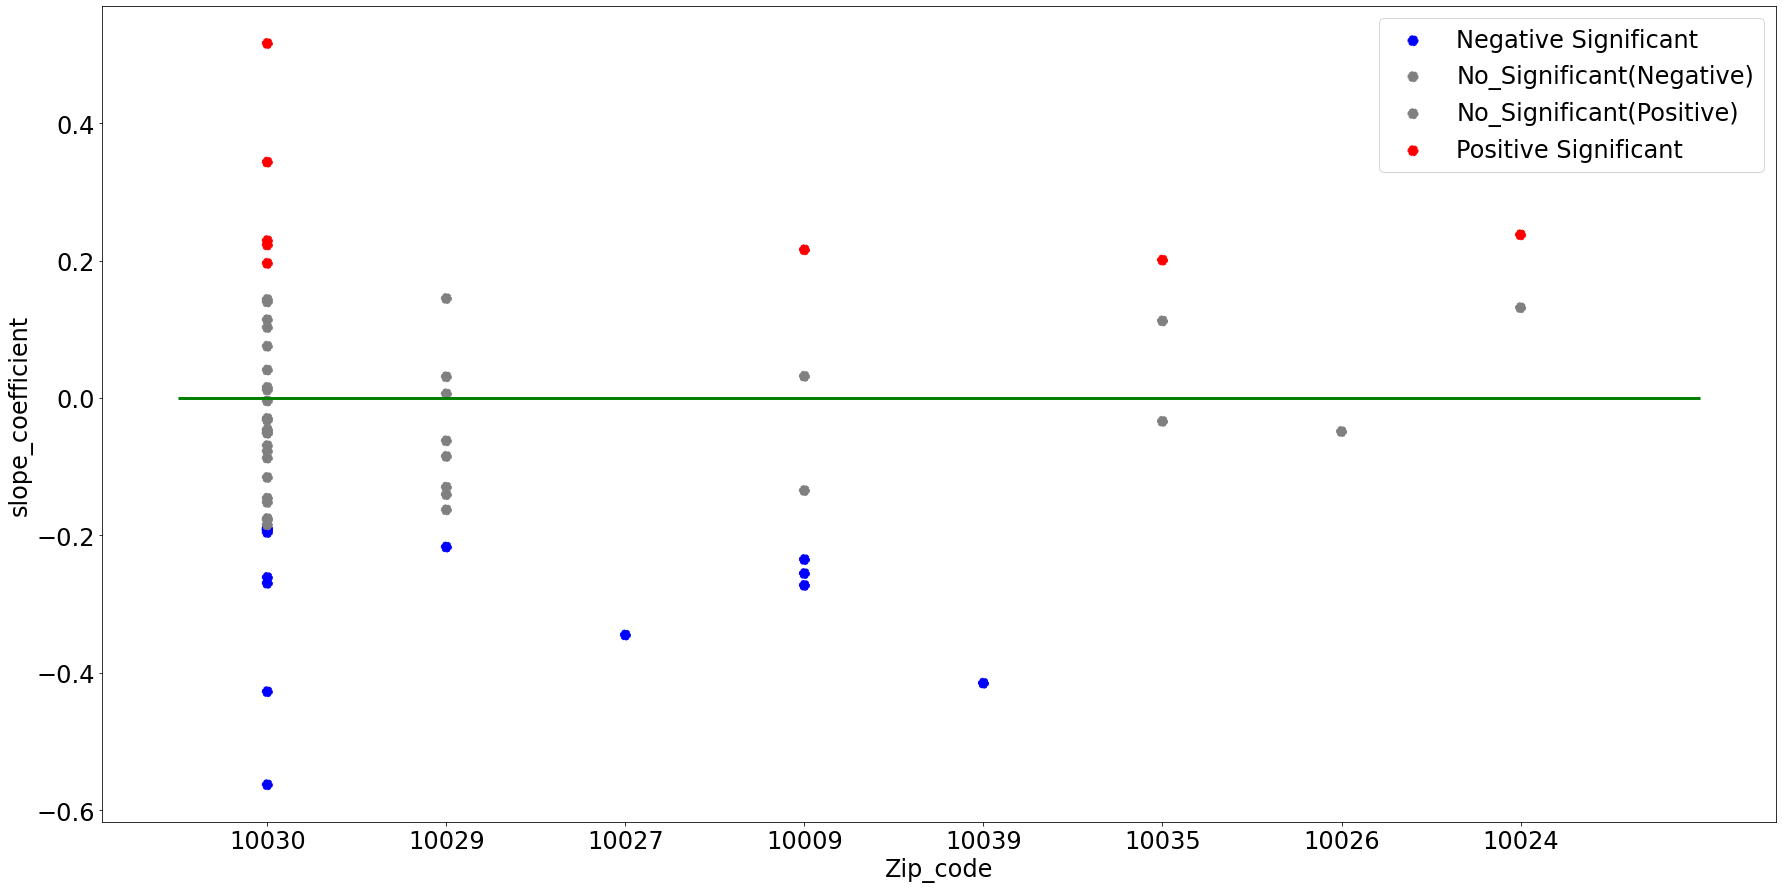

In [370]:
 plt.rcParams['figure.figsize'] = (30, 15)

fig, ax = plt.subplots()

colors = {'No_Significant(Positive)':'grey','No_Significant(Negative)':'grey', 'Positive Significant':'red', 'Negative Significant':'blue'}

grouped = manhattan_final.groupby('Significance')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Zip_code', y='slope_coefficient', label=key, color=colors[key], s = 100, linestyle='--')
plt.hlines(y=0, xmin=-0.5, xmax= 8, colors='green', linestyles='-', lw=3)
plt.show()

In [371]:
manhattan_final

index_x Meter Number Total Occurance Consumption Grade  \
0        59    K16137606               0                 0   
1        57    V31976211               0                 0   
2        58    E12324074               0                 0   
3        56    E12324074               1               Low   
4        31    K16838962               1               Low   
5        37    V31625181               1               Low   
6        51    O76882750               1               Low   
7        46    V83028987               1               Low   
8        53    O78224452               1               Low   
9        55    O78610228               1               Low   
10       52    G13023666               1               Low   
11       49    G13036219               2               Low   
12       27    O76882752               2               Low   
13       45    G13029990               2               Low   
14       39    E10127758               2               Low   
15       38    K15130328               2               Low   
16       34    I13011093               2               Low   
17       18    V31665696               2               Low   
18       29    E09010099               2               Low   
19        1    K13203068               2               Low   
20        5    I11009041               2               Low   
21        6    K16839989               2               Low   
22       16    I13007391               2               Low   
23       17    E17794141               2               Low   
24        9    A08000848               2               Low   
25        8    V31655205               2               Low   
26       10    V31625176               3          Moderate   
27       40    E94618885               3          Moderate   
28       41    E13314706               3          Moderate   
29       42    A08000399               3          Moderate   
30       43    A08000393               3          Moderate   
31        7    V31665667               3          Moderate   
32       50    E13325671               3          Moderate   
33       54    V31633777               3          Moderate   
34        3    K16795588               3          Moderate   
35        2    A06002042               3          Moderate   
36       47    B35397973               3          Moderate   
37       11    E98161917               3          Moderate   
38        0    V31983271               3          Moderate   
39       36    G13031843               3          Moderate   
40       21    I13007923               3          Moderate   
41       22    V31952918               3          Moderate   
42       12    V31841824               3          Moderate   
43       28    E09010097               3          Moderate   
44       33    K14834217               3          Moderate   
45       13    V31665692               3          Moderate   
46       35    E15958343               3          Moderate   
47       32    I13005313               3          Moderate   
48       44    V31665698               4          Moderate   
49       14    V31625178               4          Moderate   
50       48    V84010435               4          Moderate   
51       26    V31625179               4          Moderate   
52       25    V31946013               4          Moderate   
53       24    V31847574               4          Moderate   
54        4    I13012733               4          Moderate   
55       20    V31665671               4          Moderate   
56       19    V31625180               4          Moderate   
57       30    I13005250               5          Moderate   
58       15    E10052406               5          Moderate   
59       23    V31665691               5          Moderate   

                    Temp   Avg_temp      Prob Zip_code  index_y  \
0                     50  50.000000  0.000000    10030       17   
1                     50  50.000000  0.000000    10035       50   
2                   

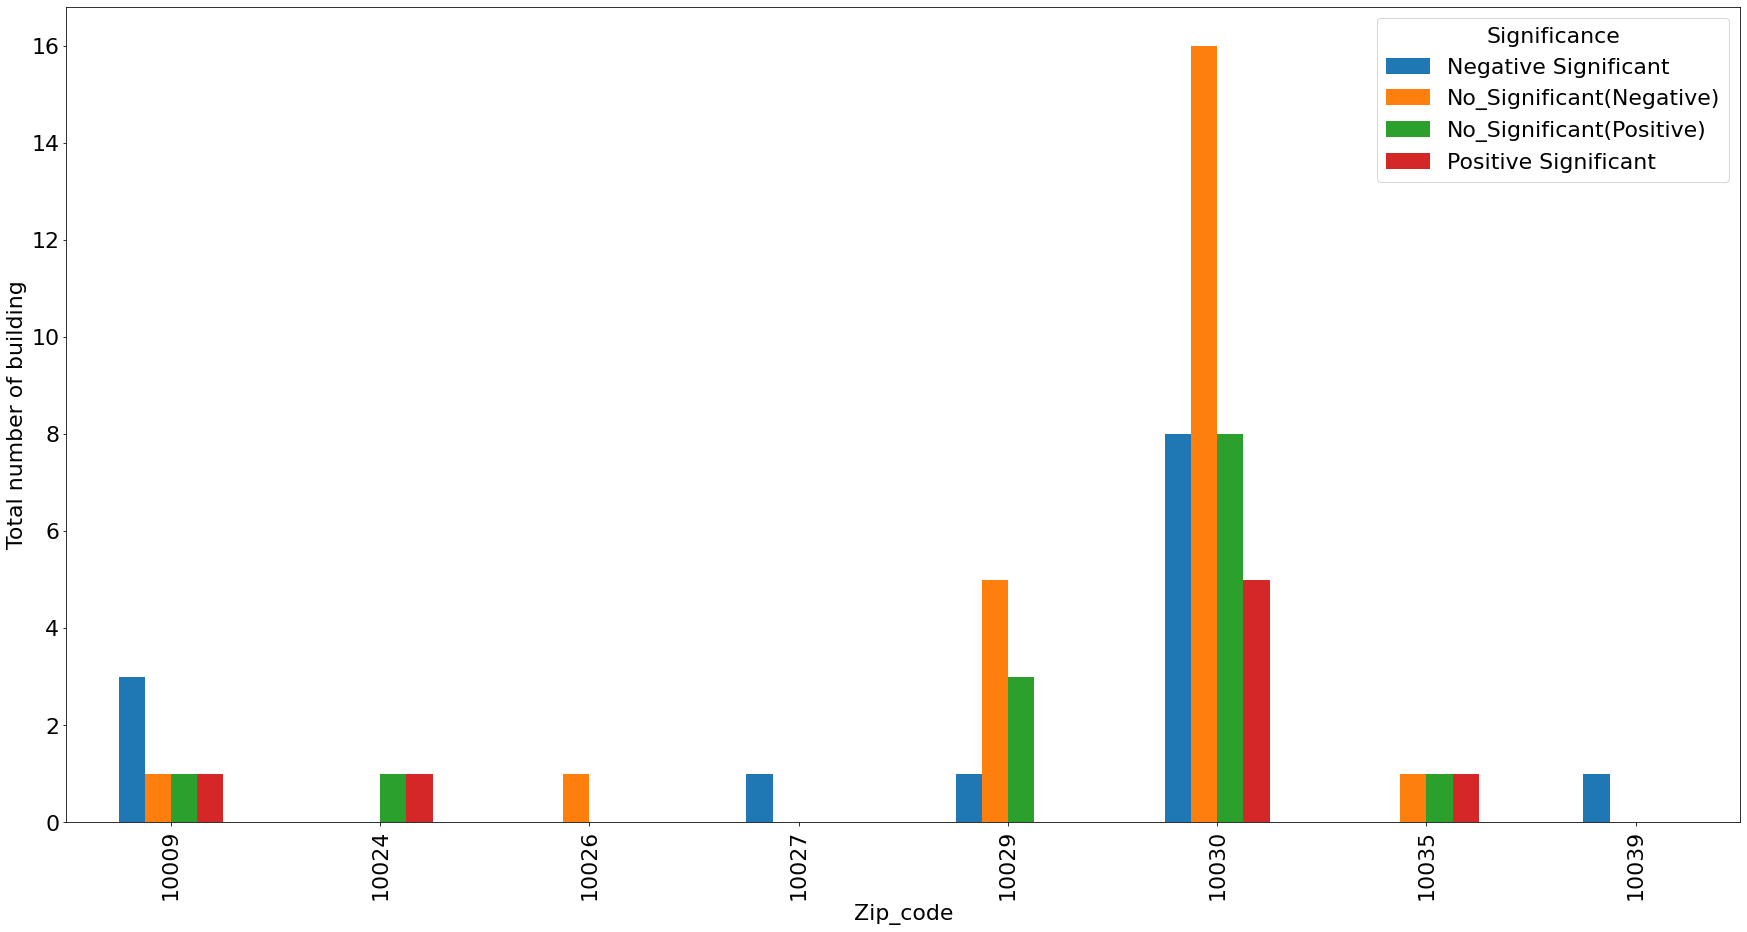

In [377]:
fig, ax = plt.subplots(figsize=(30,15))
manhattan_final.groupby(['Zip_code','Significance']).count()['Total Occurance'].unstack().plot.bar(ax=ax)
font = {'family' : 'normal','weight' : 'normal', 'size'   : 22}  
plt.rc('font', **font)  
plt.ylabel("Total number of building")
plt.show()


In [373]:
manhattan_final.groupby(['Zip_code','Significance']).count()

index_x  Meter Number  Total Occurance  \
Zip_code Significance                                                       
10009    Negative Significant            3             3                3   
         No_Significant(Negative)        1             1                1   
         No_Significant(Positive)        1             1                1   
         Positive Significant            1             1                1   
10024    No_Significant(Positive)        1             1                1   
         Positive Significant            1             1                1   
10026    No_Significant(Negative)        1             1                1   
10027    Negative Significant            1             1                1   
10029    Negative Significant            1             1                1   
         No_Significant(Negative)        5             5                5   
         No_Significant(Positive)        3             3                3   
10030    Negative Significant            8             8                8   
         No_Significant(Negative)       16            16               16   
         No_Significant(Positive)        8             8                8   
         Positive Significant            5             5                5   
10035    No_Significant(Negative)        1             1                1   
         No_Significant(Positive)        1             1                1   
         Positive Significant            1             1                1   
10039    Negative Significant            1             1                1   

                                   Consumption Grade  Temp  Avg_temp  Prob  \
Zip_code Significance                                                        
10009    Negative Significant                      3     3         3     3   
         No_Significant(Negative)                  1     1         1     1   
         No_Significant(Positive)                  1     1         1     1   
         Positive Significant                      1     1         1     1   
10024    No_Significant(Positive)                  1     1         1     1   
         Positive Significant                      1     1         1     1   
10026    No_Significant(Negative)                  1     1         1     1   
10027    Negative Significant                      1     1         1     1   
10029    Negative Significant                      1     1         1     1   
         No_Significant(Negative)                  5     5         5     5   
         No_Significant(Positive)                  3     3         3     3   
10030    Negative Significant                      8     8         8     8   
         No_Significant(Negative)                 16    16        16    16   
         No_Significant(Positive)                  8     8         8     8   
         Positive Significant                      5     5         5     5   
10035    No_Significant(Negative)                  1     1         1     1   
         No_Significant(Positive)                  1     1         1     1   
         Positive Significant                      1     1         1     1   
10039    Negative Significant                      1     1         1     1   

                                   index_y  slope_coefficient  
Zip_code Significance                                          
10009    Negative Significant            3                  3  
         No_Significant(Negative)        1                  1  
         No_Significant(Positive)        1                  1  
         Positive Significant            1                  1  
10024    No_Significant(Positive)        1                  1  
         Positive Significant            1                  1  
10026    No_Significant(Negative)        1                  1  
10027    Negative Significant            1                  1  
10029    Negative Significant            1                  1  
         No_Significant(Negative)        5                  5  
         N